## imports

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install timm


In [ ]:
!pip install ultralytics
!pip install segmentation-models-pytorch


## codes

In [ ]:
import multiprocessing
num_cpus = multiprocessing.cpu_count()
print(num_cpus)
num_workers=num_cpus

8


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/output_micro_cracks_data - Copy.csv')

df.head(15)

,image_name,subfolder_name,label,a1,a2,a3,a4,a5,a6,a7,...,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32
0,1.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# List of columns to be deleted
columns_to_delete = [f"{prefix}{i}" for prefix in 'abcdef' for i in range(23, 33)]

print(columns_to_delete)

['a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'b23', 'b24', 'b25', 'b26', 'b27', 'b28', 'b29', 'b30', 'b31', 'b32', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31', 'd32', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32']


In [ ]:
# Drop the columns
df = df.drop(columns=columns_to_delete)

# Check the remaining columns
df


,image_name,subfolder_name,label,a1,a2,a3,a4,a5,a6,a7,...,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22
0,1.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,H06240200849540_240209011446.jpg,H06240209000316A012987C19F1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
104,H06240200849686_240209012610.jpg,H06240209000316A012987C19F1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
105,H06240200849691_240209005923.jpg,H06240209000316A012987C19F1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
106,H06240200849695_240209011820.jpg,H06240209000316A012987C19F1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

# Reading the data
Df = pd.read_csv('/content/drive/MyDrive/parsa - Copy.csv')

# Merging row-wise and naming the result as df
df = pd.concat([df, Df], ignore_index=True)

# Displaying the first 15 rows of the merged dataframe
df

,image_name,subfolder_name,label,a1,a2,a3,a4,a5,a6,a7,...,f14,f15,f16,f17,f18,f19,f20,f21,f22,Column1
0,1.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,2.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,3.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,4.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,5.jpg,labeled,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,H06240200844214_240208085348.jpg,H06240211001976A012987C19F1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1086.0
124,H06240200844379_240208090220.jpg,H06240211001976A012987C19F1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1087.0
125,H06240200845623_240208085326.jpg,H06240211001976A012987C19F1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1088.0
126,H06240200845719_240211071826.jpg,H06240211001976A012987C19F1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1089.0


In [ ]:
# List of columns to check (excluding 'image_name', 'subfolder_name', and 'label')
columns_to_check = [col for col in df.columns if col not in ['image_name', 'subfolder_name', 'label']]

# Update the 'label' column to 1 if any value in the row across the specified columns is 1
df['label'] = np.where(df[columns_to_check].eq(1).any(axis=1), 1, df['label'])

# Check the updated dataframe
df.head()


,image_name,subfolder_name,label,a1,a2,a3,a4,a5,a6,a7,...,f14,f15,f16,f17,f18,f19,f20,f21,f22,Column1
0,1.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,2.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,3.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,4.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,5.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN


In [ ]:
# List of columns to sum (from a1 to f22)
columns_to_sum = [f"{prefix}{i}" for prefix in 'abcdef' for i in range(1, 23)]

# Create a new column 'num' as the sum of these columns
df['num'] = df[columns_to_sum].sum(axis=1)

# Check the updated dataframe
df.head()


<ipython-input-10-642db74a5c2c>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['num'] = df[columns_to_sum].sum(axis=1)


,image_name,subfolder_name,label,a1,a2,a3,a4,a5,a6,a7,...,f15,f16,f17,f18,f19,f20,f21,f22,Column1,num
0,1.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,8
1,2.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4
2,3.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,9
3,4.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4
4,5.jpg,labeled,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,3


In [ ]:
# Calculate the sum of all 'num' values
total_sum_num = df['num'].sum()
total_sum_num


739

In [ ]:
# Create an empty list to hold rows for the new dataframe
transformed_rows = []

# Iterate over each row in the original dataframe
for index, row in df.iterrows():
    # Iterate over columns a1 to f22
    for col in columns_to_sum:  # 'columns_to_sum' holds 'a1' to 'f22'
        # Append a new row to transformed_rows with the required columns
        transformed_rows.append({
            'image_name': row['image_name'],
            'subfolder_name': row['subfolder_name'],
            'cell_number': col,  # Column name as cell_number
            'LABEL': row[col]  # Corresponding value as LABEL
        })

# Create a new dataframe from the transformed rows
transformed_df = pd.DataFrame(transformed_rows)

# Check the first few rows of the transformed dataframe
transformed_df.head()


,image_name,subfolder_name,cell_number,LABEL
0,1.jpg,labeled,a1,0
1,1.jpg,labeled,a2,0
2,1.jpg,labeled,a3,0
3,1.jpg,labeled,a4,0
4,1.jpg,labeled,a5,0


In [ ]:
# Check the distribution of 'LABEL' in the transformed dataframe
label_distribution = transformed_df['LABEL'].value_counts()
print(label_distribution)


LABEL
0    16157
1      739
Name: count, dtype: int64


In [ ]:
# Check the distribution of 'LABEL'
label_distribution = transformed_df['LABEL'].value_counts()
print(label_distribution)

# Show the record where 'LABEL' is 2
record_with_label_2 = transformed_df[transformed_df['LABEL'] == 2]
(record_with_label_2)


LABEL
0    16157
1      739
Name: count, dtype: int64


,image_name,subfolder_name,cell_number,LABEL


In [ ]:
# Replace label 2 with label 1
transformed_df['LABEL'] = transformed_df['LABEL'].replace(2, 0)

# Verify the update by checking the distribution again
label_distribution = transformed_df['LABEL'].value_counts()
print(label_distribution)


LABEL
0    16157
1      739
Name: count, dtype: int64


In [ ]:
# Check if there are rows where 'num' > 0 but no 1s in 'a1' to 'f22' columns
inconsistent_rows = df[(df['num'] > 0) & (df[columns_to_sum].eq(1).sum(axis=1) == 0)]

# Output inconsistent rows, if any
inconsistent_rows


,image_name,subfolder_name,label,a1,a2,a3,a4,a5,a6,a7,...,f15,f16,f17,f18,f19,f20,f21,f22,Column1,num


In [ ]:
import pandas as pd

# Assuming transformed_df is the DataFrame
# source_path = "/content/drive/MyDrive/nokhbegan_dataset"
source_path = "/content/drive/MyDrive/new_nokhbegan_zip"
# Function to convert cell_number and create the file path
def generate_file_path(row):
    # Convert cell_number (e.g., "a1" to "a_1")
    cell_number_new = row['cell_number']

    # Construct the file path
    file_path = (f"{source_path}/{row['subfolder_name']}/{row['image_name'][:-4]}/"
                 f"sub_image_{cell_number_new}.png")

    return file_path

# Apply the function to each row and store in a new column 'file_path'
transformed_df['file_path'] = transformed_df.apply(generate_file_path, axis=1)

# View the updated DataFrame with correct file paths
(transformed_df[['image_name', 'subfolder_name', 'cell_number', 'file_path']])


,image_name,subfolder_name,cell_number,file_path
0,1.jpg,labeled,a1,/content/drive/MyDrive/new_nokhbegan_zip/label...
1,1.jpg,labeled,a2,/content/drive/MyDrive/new_nokhbegan_zip/label...
2,1.jpg,labeled,a3,/content/drive/MyDrive/new_nokhbegan_zip/label...
3,1.jpg,labeled,a4,/content/drive/MyDrive/new_nokhbegan_zip/label...
4,1.jpg,labeled,a5,/content/drive/MyDrive/new_nokhbegan_zip/label...
...,...,...,...,...
16891,H06240200846336_240208095345.jpg,H06240211001976A012987C19F1,f18,/content/drive/MyDrive/new_nokhbegan_zip/H0624...
16892,H06240200846336_240208095345.jpg,H06240211001976A012987C19F1,f19,/content/drive/MyDrive/new_nokhbegan_zip/H0624...
16893,H06240200846336_240208095345.jpg,H06240211001976A012987C19F1,f20,/content/drive/MyDrive/new_nokhbegan_zip/H0624...
16894,H06240200846336_240208095345.jpg,H06240211001976A012987C19F1,f21,/content/drive/MyDrive/new_nokhbegan_zip/H0624...


In [ ]:
# import pandas as pd

# # Assuming transformed_df is the DataFrame
# source_path = "/content/drive/MyDrive/nokhbegan_dataset"

# # Function to convert cell_number and create the file path
# def generate_file_path(row):
#     # Convert cell_number (e.g., "a1" to "a_1")
#     cell_number_new = row['cell_number'][0] + "_" + row['cell_number'][1:]

#     # Construct the file path
#     file_path = (f"{source_path}/{row['subfolder_name']}/{row['image_name'][:-4]}/"
#                  f"preprocessed_image/preprocessed_image_{cell_number_new}.jpg")

#     return file_path

# # Apply the function to each row and store in a new column 'file_path'
# transformed_df['file_path'] = transformed_df.apply(generate_file_path, axis=1)

# # View the updated DataFrame with correct file paths
# (transformed_df[['image_name', 'subfolder_name', 'cell_number', 'file_path']])


In [ ]:
transformed_df[['file_path','LABEL']]

,file_path,LABEL
0,/content/drive/MyDrive/new_nokhbegan_zip/label...,0
1,/content/drive/MyDrive/new_nokhbegan_zip/label...,0
2,/content/drive/MyDrive/new_nokhbegan_zip/label...,0
3,/content/drive/MyDrive/new_nokhbegan_zip/label...,0
4,/content/drive/MyDrive/new_nokhbegan_zip/label...,0
...,...,...
16891,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,0
16892,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,0
16893,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,0
16894,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,0


In [ ]:
  transformed_df['file_path'][0]

'/content/drive/MyDrive/new_nokhbegan_zip/labeled/1/sub_image_a1.png'

In [ ]:
transformed_df.to_csv('transformed_data.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
DF=pd.read_csv('/content/drive/MyDrive/output_micro_cracks_data.csv')


# Create an empty list to hold rows for the new dataframe
transformed_rows = []

# Iterate over each row in the original dataframe
for index, row in DF.iterrows():
    # Iterate over columns a1 to f22
    for col in columns_to_sum:  # 'columns_to_sum' holds 'a1' to 'f22'
        # Append a new row to transformed_rows with the required columns
        transformed_rows.append({
            'image_name': row['image_name'],
            'subfolder_name': row['subfolder_name'],
            'cell_number': col,  # Column name as cell_number
            'LABEL': np.nan  # Corresponding value as LABEL
        })

# Create a new dataframe from the transformed rows
transformed_DF = pd.DataFrame(transformed_rows)

# Check the first few rows of the transformed dataframe

# Assuming transformed_df is the DataFrame
# source_path = "/content/drive/MyDrive/nokhbegan_dataset"
source_path = "/content/drive/MyDrive/new_nokhbegan_zip"
# Function to convert cell_number and create the file path
def generate_file_path(row):
    # Convert cell_number (e.g., "a1" to "a_1")
    cell_number_new = row['cell_number']

    # Construct the file path
    file_path = (f"{source_path}/{row['subfolder_name']}/{row['image_name'][:-4]}/"
                 f"sub_image_{cell_number_new}.png")

    return file_path

# Apply the function to each row and store in a new column 'file_path'
transformed_DF['file_path'] = transformed_DF.apply(generate_file_path, axis=1)

# View the updated DataFrame with correct file paths
(transformed_DF[['image_name', 'subfolder_name', 'cell_number', 'file_path']])

# Assuming transformed_DF and transformed_df are your DataFrames
# with the relevant columns specified

# Specify the columns to consider
columns_to_compare = ['image_name', 'subfolder_name', 'cell_number', 'file_path']

# Merge the DataFrames while indicating the source of each row
merged_df = transformed_DF.merge(transformed_df[columns_to_compare],
                                  on=columns_to_compare,
                                  how='left',
                                  indicator=True)

# Filter to get only the records in transformed_DF that are not in transformed_df
result_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# result_df now contains the records from transformed_DF that are not in transformed_df
result_df[columns_to_compare].to_csv('unlabeled.csv')

In [ ]:
import pandas as pd

# Path to the Excel file
file_path = '/content/drive/MyDrive/test.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame
(df)


,Image_number,Micro_Row_Number,Micro_Column_Number,Unnamed: 3,Unnamed: 4
0,21,3.0,10.0,NaN,NaN
1,21,4.0,10.0,NaN,NaN
2,21,5.0,17.0,NaN,NaN
3,21,5.0,22.0,NaN,NaN
4,21,6.0,8.0,NaN,NaN
...,...,...,...,...,...
245,60,4.0,19.0,NaN,NaN
246,60,6.0,4.0,شک دارم,NaN
247,60,NaN,NaN,NaN,NaN
248,60,NaN,NaN,NaN,NaN


In [ ]:
# Count the total number of NaN values in the entire DataFrame
total_nan_values = df.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {total_nan_values}")

# Count the number of NaN values per column
nan_per_column = df.isna().sum()
print("NaN values per column:")
print(nan_per_column)


Total NaN values in the DataFrame: 480
NaN values per column:
Image_number             0
Micro_Row_Number         3
Micro_Column_Number      3
Unnamed: 3             225
Unnamed: 4             249
dtype: int64


In [ ]:
# Count unique values in the 'Image_number' column
unique_image_numbers = df['Image_number'].nunique()
print(f"Number of unique values in 'Image_number': {unique_image_numbers}")


Number of unique values in 'Image_number': 40


In [ ]:
# Create a mapping for Micro_Row_Number
mapping = {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f'}

# Replace values in 'Micro_Row_Number' column
df['Micro_Row_Number'] = df['Micro_Row_Number'].replace(mapping)
# Rename the 'Image_number' column to 'image_name'
df.rename(columns={'Image_number': 'image_name'}, inplace=True)



In [ ]:
# Drop the 'Unnamed: 3' and 'Unnamed: 4' columns
df.drop(columns=['Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Add the 'cell_number' column by combining the 'Micro_Row_Number' and 'Micro_Column_Number' columns
df['cell_number'] = df['Micro_Row_Number'].astype(str) + df['Micro_Column_Number'].astype(int).astype(str)

# Display the updated DataFrame (optional)
(df)


,image_name,Micro_Row_Number,Micro_Column_Number,cell_number
0,21,c,10.0,c10
1,21,d,10.0,d10
2,21,e,17.0,e17
3,21,e,22.0,e22
4,21,f,8.0,f8
...,...,...,...,...
242,59,d,10.0,d10
243,60,b,13.0,b13
244,60,c,6.0,c6
245,60,d,19.0,d19


In [ ]:
# Initialize the new DataFrame with specified columns
new_columns = ['image_name', 'subfolder_name', 'cell_number', 'file_path', 'label']
new_df = pd.DataFrame(columns=new_columns)

# Create a list to collect all the rows, which we'll concatenate later
rows = []

# Function to get the new cell_number based on the index
def get_cell_number(index):
    if index < 1 or index > 132:
        raise ValueError("Index out of range for cell numbers.")

    # Determine the letter prefix (a-f)
    letter = chr(97 + (index - 1) // 22)  # 97 is the ASCII value for 'a'
    number = (index - 1) % 22 + 1  # Get the number from 1 to 22
    return f"{letter}{number}"

# Generate data for the new DataFrame
for i in range(21, 21 + unique_image_numbers):
    for j in range(1, 133):  # 132 records for each image
        cell_number = get_cell_number(j)
        row = {
            'image_name': (i),
            'subfolder_name': 'test',  # Subfolder name is 'test' for all records
            'cell_number':cell_number ,  # Get the new cell number
            #             '/content/drive/MyDrive/nokhbegan_dataset_test/Test data_microcrack/21/sub_image_a1.png'
            'file_path': f'/content/drive/MyDrive/nokhbegan_dataset_test/Test_data_microcrack/{i}/sub_image_{cell_number}.png',
            'label': 0  # Replace with appropriate label if necessary
        }
        rows.append(row)

# Use pd.concat to create a DataFrame from the list of rows
new_df = pd.concat([new_df, pd.DataFrame(rows)], ignore_index=True)

# Display the first few rows of the new DataFrame
(new_df)


,image_name,subfolder_name,cell_number,file_path,label
0,21,test,a1,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
1,21,test,a2,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
2,21,test,a3,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
3,21,test,a4,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
4,21,test,a5,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
...,...,...,...,...,...
5275,60,test,f18,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
5276,60,test,f19,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
5277,60,test,f20,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
5278,60,test,f21,/content/drive/MyDrive/nokhbegan_dataset_test/...,0


In [ ]:
new_df['file_path'][0]

'/content/drive/MyDrive/nokhbegan_dataset_test/Test_data_microcrack/21/sub_image_a1.png'

/content/drive/MyDrive/new_nokhbegan_zip/labeled/1/sub_image_a1.png

/content/drive/MyDrive/nokhbegan_dataset_test/Test_data_microcrack/21/sub_image_a1.png
/content/drive/MyDrive/nokhbegan_dataset_test/Test_data_microcrack/21/sub_image_a1.png

In [ ]:
# Merge the two dataframes to identify matching records
# We'll merge on 'image_name' and 'cell_number' since they should uniquely identify the records
merged_df = pd.merge(new_df, df[['image_name', 'cell_number']], on=['image_name', 'cell_number'], how='left', indicator=True)

# Update the 'label' column in new_df to 1 for matching records (those found in df)
new_df['label'] = merged_df['_merge'].apply(lambda x: 1 if x == 'both' else 0)

# Display the first few rows of the updated new_df
(new_df)


,image_name,subfolder_name,cell_number,file_path,label
0,21,test,a1,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
1,21,test,a2,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
2,21,test,a3,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
3,21,test,a4,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
4,21,test,a5,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
...,...,...,...,...,...
5275,60,test,f18,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
5276,60,test,f19,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
5277,60,test,f20,/content/drive/MyDrive/nokhbegan_dataset_test/...,0
5278,60,test,f21,/content/drive/MyDrive/nokhbegan_dataset_test/...,0


In [ ]:
# Sum of labels in new_df
total_labels_sum = new_df['label'].sum()
print(f"Sum of labels in new_df: {total_labels_sum}")


Sum of labels in new_df: 247


In [ ]:
new_df = new_df.rename(columns={'label': 'LABEL'})
new_df.to_csv('new_labeled.csv')

In [ ]:
batch_size = 32
num_epochs = 100
learning_rate = 1e-4

## model

model 0 seb

Epoch 1/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.18it/s]


train Loss: 0.6895 Acc: 0.5520


100%|██████████| 7/7 [00:01<00:00,  6.97it/s]


val Loss: 0.6805 Acc: 0.5495
Validation loss improved from 10000.0000 to 0.6805, saving checkpoint...
Epoch 2/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.29it/s]


train Loss: 0.6820 Acc: 0.5711


100%|██████████| 7/7 [00:00<00:00,  7.01it/s]


val Loss: 0.6880 Acc: 0.5405
Epoch 3/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.27it/s]


train Loss: 0.6807 Acc: 0.5728


100%|██████████| 7/7 [00:00<00:00,  7.06it/s]


val Loss: 0.6806 Acc: 0.5541
Epoch 4/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.27it/s]


train Loss: 0.6786 Acc: 0.5766


100%|██████████| 7/7 [00:00<00:00,  7.53it/s]


val Loss: 0.6877 Acc: 0.5405
Epoch 5/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.30it/s]


train Loss: 0.6744 Acc: 0.5823


100%|██████████| 7/7 [00:00<00:00,  7.22it/s]


val Loss: 0.6886 Acc: 0.5541
Epoch 6/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.26it/s]


train Loss: 0.6698 Acc: 0.5892


100%|██████████| 7/7 [00:01<00:00,  6.82it/s]


val Loss: 0.6851 Acc: 0.5631
Epoch 7/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.28it/s]


train Loss: 0.6643 Acc: 0.5939


100%|██████████| 7/7 [00:00<00:00,  7.32it/s]


val Loss: 0.6880 Acc: 0.5901
Epoch 8/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.30it/s]


train Loss: 0.4795 Acc: 0.7638


100%|██████████| 7/7 [00:00<00:00,  7.46it/s]


val Loss: 0.2780 Acc: 0.9054
Validation loss improved from 0.6805 to 0.2780, saving checkpoint...
Epoch 9/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.30it/s]


train Loss: 0.1575 Acc: 0.9518


100%|██████████| 7/7 [00:00<00:00,  7.33it/s]


val Loss: 0.2788 Acc: 0.9279
Epoch 10/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.33it/s]


train Loss: 0.0892 Acc: 0.9757


100%|██████████| 7/7 [00:00<00:00,  7.30it/s]


val Loss: 0.2971 Acc: 0.9234
Epoch 11/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.30it/s]


train Loss: 0.0560 Acc: 0.9849


100%|██████████| 7/7 [00:00<00:00,  7.17it/s]


val Loss: 0.3268 Acc: 0.9234
Epoch 12/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.30it/s]


train Loss: 0.0335 Acc: 0.9906


100%|██████████| 7/7 [00:00<00:00,  7.32it/s]


val Loss: 0.3669 Acc: 0.9099
Epoch 13/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.32it/s]


train Loss: 0.0229 Acc: 0.9928


100%|██████████| 7/7 [00:00<00:00,  7.09it/s]


val Loss: 0.4294 Acc: 0.9099
Epoch 14/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.29it/s]


train Loss: 0.0224 Acc: 0.9934


100%|██████████| 7/7 [00:00<00:00,  7.39it/s]


val Loss: 0.4532 Acc: 0.9279
Epoch 15/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.32it/s]


train Loss: 0.0182 Acc: 0.9938


100%|██████████| 7/7 [00:00<00:00,  7.26it/s]


val Loss: 0.4395 Acc: 0.9144
Epoch 16/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.30it/s]


train Loss: 0.0241 Acc: 0.9927


100%|██████████| 7/7 [00:00<00:00,  7.07it/s]


val Loss: 0.4226 Acc: 0.9234
Epoch 17/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.30it/s]


train Loss: 0.0129 Acc: 0.9963


100%|██████████| 7/7 [00:00<00:00,  7.53it/s]


val Loss: 0.4808 Acc: 0.9189
Epoch 18/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.31it/s]


train Loss: 0.0111 Acc: 0.9969


100%|██████████| 7/7 [00:00<00:00,  7.32it/s]


val Loss: 0.4647 Acc: 0.9144
Epoch 19/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.32it/s]


train Loss: 0.0077 Acc: 0.9971


100%|██████████| 7/7 [00:01<00:00,  6.99it/s]


val Loss: 0.4832 Acc: 0.9189
Epoch 20/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.31it/s]


train Loss: 0.0071 Acc: 0.9983


100%|██████████| 7/7 [00:00<00:00,  7.14it/s]


val Loss: 0.5834 Acc: 0.9234
Epoch 21/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.30it/s]


train Loss: 0.0136 Acc: 0.9964


100%|██████████| 7/7 [00:00<00:00,  7.26it/s]


val Loss: 0.5220 Acc: 0.9234
Epoch 22/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.29it/s]


train Loss: 0.0065 Acc: 0.9978


100%|██████████| 7/7 [00:00<00:00,  7.57it/s]


val Loss: 0.5579 Acc: 0.9189
Epoch 23/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.31it/s]


train Loss: 0.0133 Acc: 0.9961


100%|██████████| 7/7 [00:00<00:00,  7.13it/s]


val Loss: 0.5198 Acc: 0.9144
Epoch 24/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.31it/s]


train Loss: 0.0051 Acc: 0.9987


100%|██████████| 7/7 [00:00<00:00,  7.34it/s]


val Loss: 0.5857 Acc: 0.9189
Epoch 25/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.32it/s]


train Loss: 0.0104 Acc: 0.9967


100%|██████████| 7/7 [00:00<00:00,  7.09it/s]


val Loss: 0.4818 Acc: 0.9099
Epoch 26/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.28it/s]


train Loss: 0.0064 Acc: 0.9982


100%|██████████| 7/7 [00:01<00:00,  6.96it/s]


val Loss: 0.5533 Acc: 0.9189
Epoch 27/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.32it/s]


train Loss: 0.0072 Acc: 0.9978


100%|██████████| 7/7 [00:00<00:00,  7.30it/s]


val Loss: 0.5853 Acc: 0.9189
Epoch 28/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.30it/s]


train Loss: 0.0054 Acc: 0.9985


100%|██████████| 7/7 [00:00<00:00,  7.13it/s]


val Loss: 0.5340 Acc: 0.9234
Early stopping due to no improvement in validation accuracy.
Best val Acc: 0.0000


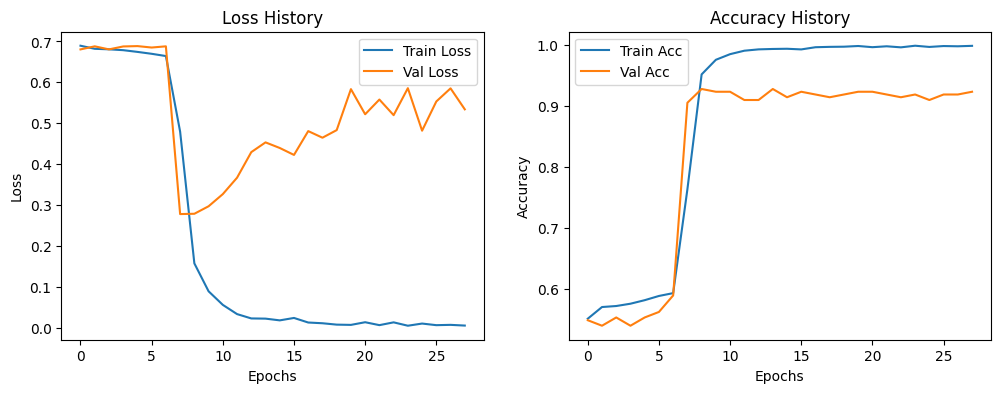

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, save_dir='checkpoints', early_stop_patience=20):
    best_acc = 0.0
    best_loss=10000
    best_model_wts = model.state_dict()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    no_improvement_epochs = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            data_loader = train_loader if phase == 'train' else val_loader
            total_samples = 0

            for inputs, labels in tqdm(data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                total_samples += labels.size(0)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    # Since UnetPlusPlus returns only one output, unpack only main_output
                    main_output = model(inputs)
                    _, preds = torch.max(main_output, 1)
                    loss = criterion(main_output, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # Check for improvement in validation accuracy
            # if phase == 'val' and epoch_acc > best_acc:
            if phase == 'val' and epoch_loss < best_loss:

                print(f"Validation loss improved from {best_loss:.4f} to {epoch_loss:.4f}, saving checkpoint...")
                # best_acc = epoch_acc
                best_loss = epoch_loss
                best_model_wts = model.state_dict()
                no_improvement_epochs = 0
                torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
            elif phase == 'val':
                no_improvement_epochs += 1

        # Early stopping
        if no_improvement_epochs >= early_stop_patience:
            print("Early stopping due to no improvement in validation accuracy.")
            break

    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history


def plot_history(history):
    epochs = len(history['train_loss'])
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.title('Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['train_acc'], label='Train Acc')
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.title('Accuracy History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import numpy as np

class StructuredFlipAugmentation:
    def __init__(self, include_brightness_contrast=False, include_jitter=False):
        self.horizontal_flip = transforms.RandomHorizontalFlip(p=1.0)
        self.vertical_flip = transforms.RandomVerticalFlip(p=1.0)
        self.include_brightness_contrast = include_brightness_contrast
        self.include_jitter = include_jitter
        self.jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
        self.gaussian_noise = lambda img: img + torch.randn(img.size()) * 0.1  # Add Gaussian noise

        if include_brightness_contrast:
            self.brightness_contrast = transforms.ColorJitter(brightness=0.2, contrast=0.2)

    def apply_flips(self, img):
        augmented = [
            img,  # Original image
            self.vertical_flip(img),  # Vertically flipped
            self.horizontal_flip(img),  # Horizontally flipped
            self.vertical_flip(self.horizontal_flip(img))  # Both vertical and horizontal flipped
        ]
        return augmented

    def apply_brightness_contrast(self, augmented_images):
        return [self.brightness_contrast(img) for img in augmented_images]

    def apply_jitter(self, augmented_images):
        return [self.jitter(img) for img in augmented_images]

    def __call__(self, img, augmentation_type='flip'):
        augmented = self.apply_flips(img)

        if augmentation_type == 'fully' and self.include_brightness_contrast:
            brightness_contrast_augmented = self.apply_brightness_contrast(augmented)
            augmented.extend(brightness_contrast_augmented)

        if self.include_jitter:
            jitter_augmented = self.apply_jitter(augmented)
            augmented.extend(jitter_augmented)

        return augmented


class SolarCellDataset(Dataset):
    def __init__(self, dataframe, transform=None, augmentation='none'):
        self.dataframe = dataframe
        self.transform = transform
        self.augmentation = augmentation
        self.flip_aug = StructuredFlipAugmentation(include_brightness_contrast=(augmentation == 'fully'),
                                                   include_jitter=(augmentation == 'jitter'))

    def __len__(self):
        if self.augmentation == 'none':
            return len(self.dataframe)
        elif self.augmentation == 'flip':
            return len(self.dataframe) * 4  # Original + 3 flips
        elif self.augmentation == 'fully':
            return len(self.dataframe) * 8  # Flip (4x) + Brightness/Contrast (4x)
        elif self.augmentation == 'jitter':
            return len(self.dataframe) * 12  # Add jitter to fully augmented data

    def __getitem__(self, idx):
        # Find the index of the original image in the dataframe
        original_idx = idx % len(self.dataframe)  # Wrap idx around the length of original dataset
        img_path = self.dataframe.iloc[original_idx, 0]  # Assuming 'file_path' is the first column
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = self.dataframe.iloc[original_idx, 1]  # Assuming 'LABEL' is the second column

        if self.augmentation != 'none':
            # Apply structured flipping and (optionally) brightness/contrast augmentation
            augmented_images = self.flip_aug(image, augmentation_type=self.augmentation)
            image = augmented_images[idx % len(augmented_images)]

            # image = augmented_images[idx // len(self.dataframe)]  # Select the corresponding augmented image

        if self.transform:
            image = self.transform(image)

        return image, label


# Load and preprocess data
transformed_df = pd.read_csv('transformed_data.csv')



# Use undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(transformed_df[['file_path']], transformed_df['LABEL'])
balanced_df = pd.DataFrame({'file_path': X_resampled['file_path'], 'LABEL': y_resampled})
train_df, eval_df = train_test_split(balanced_df, test_size=0.15, random_state=42, stratify=balanced_df['LABEL'])
criterion = nn.CrossEntropyLoss()


transform = transforms.Compose([
    transforms.Resize((608, 128)),  # Adjust dimensions if necessary
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize the grayscale image
])

train_dataset = SolarCellDataset(dataframe=train_df, transform=transform, augmentation='jitter')
eval_dataset = SolarCellDataset(dataframe=eval_df, transform=transform, augmentation='none')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

class SolarCellCrackDetector(nn.Module):
    def __init__(self, num_classes=2):
        super(SolarCellCrackDetector, self).__init__()
        self.model = CustomCNN(num_classes=num_classes)

    def forward(self, x):
        return self.model(x)


class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.fc1 = nn.Linear(channels, channels // reduction, bias=False)
        self.dropout1 = nn.Dropout(0.5)  # Dropout added after the first FC layer
        self.fc2 = nn.Linear(channels // reduction, channels, bias=False)
        self.dropout2 = nn.Dropout(0.5)  # Dropout added after the second FC layer

    def forward(self, x):
        batch_size, channels, _, _ = x.size()
        y = torch.mean(x, dim=[2, 3])
        y = self.fc1(y)
        y = nn.ReLU()(y)  # Correct activation function call
        y = self.dropout1(y)  # Apply dropout
        y = self.fc2(y)
        y = torch.sigmoid(y)  # Correct activation function call
        y = self.dropout2(y)  # Apply dropout
        y = y.view(batch_size, channels, 1, 1)
        return x * y

import torch
import torch.nn as nn

class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SEBlock, self).__init__()
        self.fc1 = nn.Linear(channels, channels // reduction, bias=False)
        self.dropout1 = nn.Dropout(0.5)  # Dropout added after the first FC layer
        self.fc2 = nn.Linear(channels // reduction, channels, bias=False)
        self.dropout2 = nn.Dropout(0.5)  # Dropout added after the second FC layer

    def forward(self, x):
        batch_size, channels, _, _ = x.size()
        # Squeeze operation: Global Average Pooling
        y = torch.mean(x, dim=[2, 3])
        # Fully connected layers with ReLU and Dropout
        y = self.fc1(y)
        y = nn.ReLU()(y)
        y = self.dropout1(y)
        y = self.fc2(y)
        y = torch.sigmoid(y)
        y = self.dropout2(y)
        # Re-scale the input using the SE module's output
        y = y.view(batch_size, channels, 1, 1)
        return x * y


class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()

        # First convolutional block
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=7, stride=1, padding=3),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(0.3),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Second convolutional block
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(0.3),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Third convolutional block
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Dropout(0.3),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fourth convolutional block
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Dropout(0.3),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fifth convolutional block with SEBlock
        self.conv5 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            SEBlock(512),  # Adding SEBlock here
            nn.AdaptiveAvgPool2d((1, 1))
        )

        # Calculate the size after the last conv layer for classifier heads
        self.flattened_size = 512  # As output is 512 after adaptive pooling

        # Multi-head classifiers after the third convolutional block
        self.classifier_head1 = nn.Linear(128 * 8 * 8, num_classes)  # Adjust input size based on your output size
        self.classifier_head2 = nn.Linear(128 * 8 * 8, num_classes)

        # Fully connected layers for final classification
        self.fc = nn.Sequential(
            nn.Linear(self.flattened_size, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        # Pass through the first two conv blocks
        x = self.conv1(x)
        x = self.conv2(x)

        # Flatten for the first classifier head
        x_flat = x.view(x.size(0), -1)
        head1_output = self.classifier_head1(x_flat)

        # Pass through the third conv block
        x = self.conv3(x)

        # Flatten for the second classifier head
        x_flat = x.view(x.size(0), -1)
        head2_output = self.classifier_head2(x_flat)

        # Continue through the remaining conv layers
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.size(0), -1)  # Flatten after adaptive pooling

        # Fully connected layer predictions
        x = self.fc(x)

        return head1_output, head2_output, x


class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()

        # First convolutional block
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=7, stride=1, padding=3),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Second convolutional block
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Third convolutional block
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fourth convolutional block
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fifth convolutional block
        self.conv5 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Instantiate the model
model = SolarCellCrackDetector(num_classes=2).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  # L2 regularization

# Create checkpoints directory if it doesn't exist
if not os.path.exists('checkpoints'):
    os.makedirs('checkpoints')

# Train the model
trained_model, history = train_model(model, train_loader, eval_loader, criterion, optimizer, num_epochs, device)

# Plot the training history
plot_history(history)

# Save the final model
torch.save(trained_model.state_dict(), 'solar_cell_crack_detector_final.pth')

model 2 normal cnn data jitter

Epoch 1/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.00it/s]


train Loss: 0.6931 Acc: 0.5417


100%|██████████| 7/7 [00:00<00:00,  7.30it/s]


val Loss: 0.7081 Acc: 0.5315
Validation loss improved from 10000.0000 to 0.7081, saving checkpoint...
Epoch 2/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.00it/s]


train Loss: 0.6886 Acc: 0.5478


100%|██████████| 7/7 [00:00<00:00,  7.70it/s]


val Loss: 0.6903 Acc: 0.5270
Validation loss improved from 0.7081 to 0.6903, saving checkpoint...
Epoch 3/100
----------


100%|██████████| 471/471 [00:42<00:00, 10.99it/s]


train Loss: 0.6856 Acc: 0.5612


100%|██████████| 7/7 [00:00<00:00,  7.10it/s]


val Loss: 0.6876 Acc: 0.5450
Validation loss improved from 0.6903 to 0.6876, saving checkpoint...
Epoch 4/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.00it/s]


train Loss: 0.6849 Acc: 0.5632


100%|██████████| 7/7 [00:00<00:00,  7.61it/s]


val Loss: 0.6841 Acc: 0.5541
Validation loss improved from 0.6876 to 0.6841, saving checkpoint...
Epoch 5/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.6825 Acc: 0.5698


100%|██████████| 7/7 [00:00<00:00,  7.13it/s]


val Loss: 0.6880 Acc: 0.5360
Epoch 6/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.6810 Acc: 0.5693


100%|██████████| 7/7 [00:00<00:00,  7.09it/s]


val Loss: 0.6791 Acc: 0.5450
Validation loss improved from 0.6841 to 0.6791, saving checkpoint...
Epoch 7/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.6782 Acc: 0.5780


100%|██████████| 7/7 [00:00<00:00,  7.11it/s]


val Loss: 0.6808 Acc: 0.5541
Epoch 8/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.6769 Acc: 0.5792


100%|██████████| 7/7 [00:01<00:00,  6.94it/s]


val Loss: 0.6847 Acc: 0.5586
Epoch 9/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.6759 Acc: 0.5843


100%|██████████| 7/7 [00:00<00:00,  7.12it/s]


val Loss: 0.6819 Acc: 0.5450
Epoch 10/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.02it/s]


train Loss: 0.6713 Acc: 0.5882


100%|██████████| 7/7 [00:00<00:00,  7.08it/s]


val Loss: 0.6729 Acc: 0.5766
Validation loss improved from 0.6791 to 0.6729, saving checkpoint...
Epoch 11/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.00it/s]


train Loss: 0.6709 Acc: 0.5885


100%|██████████| 7/7 [00:00<00:00,  7.06it/s]


val Loss: 0.6723 Acc: 0.5586
Validation loss improved from 0.6729 to 0.6723, saving checkpoint...
Epoch 12/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.02it/s]


train Loss: 0.6676 Acc: 0.5925


100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


val Loss: 0.6688 Acc: 0.5360
Validation loss improved from 0.6723 to 0.6688, saving checkpoint...
Epoch 13/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.00it/s]


train Loss: 0.6612 Acc: 0.6025


100%|██████████| 7/7 [00:00<00:00,  7.29it/s]


val Loss: 0.6690 Acc: 0.5586
Epoch 14/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.5943 Acc: 0.6825


100%|██████████| 7/7 [00:00<00:00,  7.23it/s]


val Loss: 0.4976 Acc: 0.7748
Validation loss improved from 0.6688 to 0.4976, saving checkpoint...
Epoch 15/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.3029 Acc: 0.8895


100%|██████████| 7/7 [00:00<00:00,  7.57it/s]


val Loss: 0.2280 Acc: 0.9324
Validation loss improved from 0.4976 to 0.2280, saving checkpoint...
Epoch 16/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.03it/s]


train Loss: 0.1784 Acc: 0.9413


100%|██████████| 7/7 [00:00<00:00,  7.16it/s]


val Loss: 0.2426 Acc: 0.9279
Epoch 17/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.02it/s]


train Loss: 0.1538 Acc: 0.9509


100%|██████████| 7/7 [00:01<00:00,  6.94it/s]


val Loss: 0.2443 Acc: 0.9279
Epoch 18/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.02it/s]


train Loss: 0.1264 Acc: 0.9608


100%|██████████| 7/7 [00:00<00:00,  7.20it/s]


val Loss: 0.2497 Acc: 0.9324
Epoch 19/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.02it/s]


train Loss: 0.1143 Acc: 0.9632


100%|██████████| 7/7 [00:00<00:00,  7.29it/s]


val Loss: 0.2847 Acc: 0.9324
Epoch 20/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.0993 Acc: 0.9700


100%|██████████| 7/7 [00:00<00:00,  7.21it/s]


val Loss: 0.2914 Acc: 0.9324
Epoch 21/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.03it/s]


train Loss: 0.0942 Acc: 0.9701


100%|██████████| 7/7 [00:00<00:00,  7.50it/s]


val Loss: 0.2551 Acc: 0.9324
Epoch 22/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.02it/s]


train Loss: 0.0880 Acc: 0.9713


100%|██████████| 7/7 [00:00<00:00,  7.21it/s]


val Loss: 0.2742 Acc: 0.9234
Epoch 23/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.04it/s]


train Loss: 0.0743 Acc: 0.9768


100%|██████████| 7/7 [00:00<00:00,  7.14it/s]


val Loss: 0.3460 Acc: 0.9369
Epoch 24/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.03it/s]


train Loss: 0.0681 Acc: 0.9773


100%|██████████| 7/7 [00:00<00:00,  7.10it/s]


val Loss: 0.2775 Acc: 0.9324
Epoch 25/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.0576 Acc: 0.9804


100%|██████████| 7/7 [00:01<00:00,  6.86it/s]


val Loss: 0.3086 Acc: 0.9324
Epoch 26/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.04it/s]


train Loss: 0.0589 Acc: 0.9809


100%|██████████| 7/7 [00:00<00:00,  7.03it/s]


val Loss: 0.3306 Acc: 0.9369
Epoch 27/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.0575 Acc: 0.9810


100%|██████████| 7/7 [00:00<00:00,  7.19it/s]


val Loss: 0.3234 Acc: 0.9234
Epoch 28/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.03it/s]


train Loss: 0.0464 Acc: 0.9835


100%|██████████| 7/7 [00:00<00:00,  7.28it/s]


val Loss: 0.3589 Acc: 0.9369
Epoch 29/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.04it/s]


train Loss: 0.0458 Acc: 0.9850


100%|██████████| 7/7 [00:00<00:00,  7.13it/s]


val Loss: 0.3828 Acc: 0.9279
Epoch 30/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.04it/s]


train Loss: 0.0423 Acc: 0.9869


100%|██████████| 7/7 [00:00<00:00,  7.05it/s]


val Loss: 0.3911 Acc: 0.9324
Epoch 31/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.03it/s]


train Loss: 0.0401 Acc: 0.9867


100%|██████████| 7/7 [00:00<00:00,  7.16it/s]


val Loss: 0.4869 Acc: 0.9234
Epoch 32/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.03it/s]


train Loss: 0.0375 Acc: 0.9876


100%|██████████| 7/7 [00:01<00:00,  6.87it/s]


val Loss: 0.4456 Acc: 0.9369
Epoch 33/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.04it/s]


train Loss: 0.0357 Acc: 0.9890


100%|██████████| 7/7 [00:01<00:00,  6.99it/s]


val Loss: 0.3615 Acc: 0.9279
Epoch 34/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.01it/s]


train Loss: 0.0325 Acc: 0.9889


100%|██████████| 7/7 [00:00<00:00,  7.10it/s]


val Loss: 0.4028 Acc: 0.9369
Epoch 35/100
----------


100%|██████████| 471/471 [00:42<00:00, 11.03it/s]


train Loss: 0.0329 Acc: 0.9897


100%|██████████| 7/7 [00:01<00:00,  6.95it/s]


val Loss: 0.4664 Acc: 0.9189
Early stopping due to no improvement in validation accuracy.
Best val Acc: 0.0000


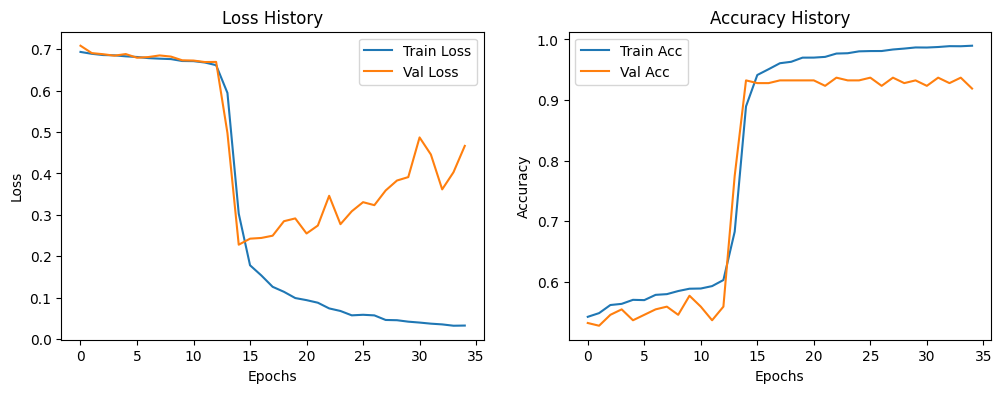

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, save_dir='checkpoints', early_stop_patience=20):
    best_acc = 0.0
    best_loss=10000
    best_model_wts = model.state_dict()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    no_improvement_epochs = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            data_loader = train_loader if phase == 'train' else val_loader
            total_samples = 0

            for inputs, labels in tqdm(data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                total_samples += labels.size(0)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    # Since UnetPlusPlus returns only one output, unpack only main_output
                    main_output = model(inputs)
                    _, preds = torch.max(main_output, 1)
                    loss = criterion(main_output, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # Check for improvement in validation accuracy
            # if phase == 'val' and epoch_acc > best_acc:
            if phase == 'val' and epoch_loss < best_loss:

                print(f"Validation loss improved from {best_loss:.4f} to {epoch_loss:.4f}, saving checkpoint...")
                # best_acc = epoch_acc
                best_loss = epoch_loss
                best_model_wts = model.state_dict()
                no_improvement_epochs = 0
                torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
            elif phase == 'val':
                no_improvement_epochs += 1

        # Early stopping
        if no_improvement_epochs >= early_stop_patience:
            print("Early stopping due to no improvement in validation accuracy.")
            break

    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history


def plot_history(history):
    epochs = len(history['train_loss'])
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.title('Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['train_acc'], label='Train Acc')
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.title('Accuracy History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import numpy as np

class StructuredFlipAugmentation:
    def __init__(self, include_brightness_contrast=False, include_jitter=False):
        self.horizontal_flip = transforms.RandomHorizontalFlip(p=1.0)
        self.vertical_flip = transforms.RandomVerticalFlip(p=1.0)
        self.include_brightness_contrast = include_brightness_contrast
        self.include_jitter = include_jitter
        self.jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
        self.gaussian_noise = lambda img: img + torch.randn(img.size()) * 0.1  # Add Gaussian noise

        if include_brightness_contrast:
            self.brightness_contrast = transforms.ColorJitter(brightness=0.2, contrast=0.2)

    def apply_flips(self, img):
        augmented = [
            img,  # Original image
            self.vertical_flip(img),  # Vertically flipped
            self.horizontal_flip(img),  # Horizontally flipped
            self.vertical_flip(self.horizontal_flip(img))  # Both vertical and horizontal flipped
        ]
        return augmented

    def apply_brightness_contrast(self, augmented_images):
        return [self.brightness_contrast(img) for img in augmented_images]

    def apply_jitter(self, augmented_images):
        return [self.jitter(img) for img in augmented_images]

    def __call__(self, img, augmentation_type='flip'):
        augmented = self.apply_flips(img)

        if augmentation_type == 'fully' and self.include_brightness_contrast:
            brightness_contrast_augmented = self.apply_brightness_contrast(augmented)
            augmented.extend(brightness_contrast_augmented)

        if self.include_jitter:
            jitter_augmented = self.apply_jitter(augmented)
            augmented.extend(jitter_augmented)

        return augmented


class SolarCellDataset(Dataset):
    def __init__(self, dataframe, transform=None, augmentation='none'):
        self.dataframe = dataframe
        self.transform = transform
        self.augmentation = augmentation
        self.flip_aug = StructuredFlipAugmentation(include_brightness_contrast=(augmentation == 'fully'),
                                                   include_jitter=(augmentation == 'jitter'))

    def __len__(self):
        if self.augmentation == 'none':
            return len(self.dataframe)
        elif self.augmentation == 'flip':
            return len(self.dataframe) * 4  # Original + 3 flips
        elif self.augmentation == 'fully':
            return len(self.dataframe) * 8  # Flip (4x) + Brightness/Contrast (4x)
        elif self.augmentation == 'jitter':
            return len(self.dataframe) * 12  # Add jitter to fully augmented data

    def __getitem__(self, idx):
        # Find the index of the original image in the dataframe
        original_idx = idx % len(self.dataframe)  # Wrap idx around the length of original dataset
        img_path = self.dataframe.iloc[original_idx, 0]  # Assuming 'file_path' is the first column
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = self.dataframe.iloc[original_idx, 1]  # Assuming 'LABEL' is the second column

        if self.augmentation != 'none':
            # Apply structured flipping and (optionally) brightness/contrast augmentation
            augmented_images = self.flip_aug(image, augmentation_type=self.augmentation)
            image = augmented_images[idx % len(augmented_images)]

            # image = augmented_images[idx // len(self.dataframe)]  # Select the corresponding augmented image

        if self.transform:
            image = self.transform(image)

        return image, label


# Load and preprocess data
transformed_df = pd.read_csv('transformed_data.csv')



# Use undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(transformed_df[['file_path']], transformed_df['LABEL'])
balanced_df = pd.DataFrame({'file_path': X_resampled['file_path'], 'LABEL': y_resampled})
train_df, eval_df = train_test_split(balanced_df, test_size=0.15, random_state=42, stratify=balanced_df['LABEL'])
criterion = nn.CrossEntropyLoss()


transform = transforms.Compose([
    transforms.Resize((608, 128)),  # Adjust dimensions if necessary
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize the grayscale image
])

train_dataset = SolarCellDataset(dataframe=train_df, transform=transform, augmentation='jitter')
eval_dataset = SolarCellDataset(dataframe=eval_df, transform=transform, augmentation='none')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

class SolarCellCrackDetector(nn.Module):
    def __init__(self, num_classes=2):
        super(SolarCellCrackDetector, self).__init__()
        self.model = CustomCNN(num_classes=num_classes)

    def forward(self, x):
        return self.model(x)


class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()

        # First convolutional block with dropout
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=7, stride=1, padding=3),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)  # Add dropout after pooling
        )

        # Second convolutional block with dropout
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)  # Add dropout after pooling
        )

        # Third convolutional block with dropout
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4)  # Higher dropout
        )

        # Fourth convolutional block with dropout
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4)  # Higher dropout
        )

        # Fifth convolutional block with dropout
        self.conv5 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Dropout(0.5)  # Highest dropout at final layer
        )

        # Fully connected layers with higher dropout rates
        self.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


# Instantiate the model
model = SolarCellCrackDetector(num_classes=2).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  # L2 regularization

# Create checkpoints directory if it doesn't exist
if not os.path.exists('checkpoints'):
    os.makedirs('checkpoints')

# Train the model
trained_model, history = train_model(model, train_loader, eval_loader, criterion, optimizer, num_epochs, device)

# Plot the training history
plot_history(history)

# Save the final model
torch.save(trained_model.state_dict(), 'solar_cell_crack_detector_final2.pth')

model 1 simpler cnn

Epoch 1/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.42it/s]


train Loss: 0.6922 Acc: 0.5442


100%|██████████| 7/7 [00:01<00:00,  6.77it/s]


val Loss: 0.6836 Acc: 0.5360
Validation loss improved from 10000.0000 to 0.6836, saving checkpoint...
Epoch 2/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.49it/s]


train Loss: 0.6857 Acc: 0.5654


100%|██████████| 7/7 [00:00<00:00,  7.09it/s]


val Loss: 0.6768 Acc: 0.5766
Validation loss improved from 0.6836 to 0.6768, saving checkpoint...
Epoch 3/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.45it/s]


train Loss: 0.6816 Acc: 0.5725


100%|██████████| 7/7 [00:00<00:00,  7.27it/s]


val Loss: 0.6807 Acc: 0.5315
Epoch 4/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.47it/s]


train Loss: 0.6790 Acc: 0.5799


100%|██████████| 7/7 [00:00<00:00,  7.33it/s]


val Loss: 0.6816 Acc: 0.5586
Epoch 5/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.50it/s]


train Loss: 0.6766 Acc: 0.5820


100%|██████████| 7/7 [00:00<00:00,  7.10it/s]


val Loss: 0.6873 Acc: 0.5631
Epoch 6/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.47it/s]


train Loss: 0.6769 Acc: 0.5813


100%|██████████| 7/7 [00:00<00:00,  7.25it/s]


val Loss: 0.6730 Acc: 0.5586
Validation loss improved from 0.6768 to 0.6730, saving checkpoint...
Epoch 7/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.47it/s]


train Loss: 0.6738 Acc: 0.5849


100%|██████████| 7/7 [00:00<00:00,  7.63it/s]


val Loss: 0.6813 Acc: 0.5541
Epoch 8/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.49it/s]


train Loss: 0.6716 Acc: 0.5890


100%|██████████| 7/7 [00:01<00:00,  6.91it/s]


val Loss: 0.6953 Acc: 0.5405
Epoch 9/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.48it/s]


train Loss: 0.6685 Acc: 0.5932


100%|██████████| 7/7 [00:00<00:00,  7.17it/s]


val Loss: 0.6736 Acc: 0.5811
Epoch 10/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.51it/s]


train Loss: 0.6643 Acc: 0.5947


100%|██████████| 7/7 [00:00<00:00,  7.18it/s]


val Loss: 0.6677 Acc: 0.5450
Validation loss improved from 0.6730 to 0.6677, saving checkpoint...
Epoch 11/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.50it/s]


train Loss: 0.6613 Acc: 0.6018


100%|██████████| 7/7 [00:01<00:00,  6.86it/s]


val Loss: 0.6539 Acc: 0.6171
Validation loss improved from 0.6677 to 0.6539, saving checkpoint...
Epoch 12/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.51it/s]


train Loss: 0.6552 Acc: 0.6105


100%|██████████| 7/7 [00:00<00:00,  7.50it/s]


val Loss: 0.6678 Acc: 0.5811
Epoch 13/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.50it/s]


train Loss: 0.6451 Acc: 0.6239


100%|██████████| 7/7 [00:00<00:00,  7.19it/s]


val Loss: 0.6470 Acc: 0.6171
Validation loss improved from 0.6539 to 0.6470, saving checkpoint...
Epoch 14/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.52it/s]


train Loss: 0.5634 Acc: 0.7269


100%|██████████| 7/7 [00:00<00:00,  7.31it/s]


val Loss: 0.4121 Acc: 0.8649
Validation loss improved from 0.6470 to 0.4121, saving checkpoint...
Epoch 15/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.52it/s]


train Loss: 0.3573 Acc: 0.8701


100%|██████████| 7/7 [00:00<00:00,  7.13it/s]


val Loss: 0.2485 Acc: 0.9144
Validation loss improved from 0.4121 to 0.2485, saving checkpoint...
Epoch 16/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.50it/s]


train Loss: 0.2243 Acc: 0.9272


100%|██████████| 7/7 [00:00<00:00,  7.01it/s]


val Loss: 0.2213 Acc: 0.9144
Validation loss improved from 0.2485 to 0.2213, saving checkpoint...
Epoch 17/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.50it/s]


train Loss: 0.1818 Acc: 0.9408


100%|██████████| 7/7 [00:00<00:00,  7.40it/s]


val Loss: 0.2123 Acc: 0.9234
Validation loss improved from 0.2213 to 0.2123, saving checkpoint...
Epoch 18/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.47it/s]


train Loss: 0.1574 Acc: 0.9512


100%|██████████| 7/7 [00:00<00:00,  7.08it/s]


val Loss: 0.2274 Acc: 0.9144
Epoch 19/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.46it/s]


train Loss: 0.1459 Acc: 0.9557


100%|██████████| 7/7 [00:00<00:00,  7.34it/s]


val Loss: 0.2376 Acc: 0.9234
Epoch 20/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.48it/s]


train Loss: 0.1418 Acc: 0.9538


100%|██████████| 7/7 [00:01<00:00,  6.74it/s]


val Loss: 0.2356 Acc: 0.9189
Epoch 21/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.49it/s]


train Loss: 0.1348 Acc: 0.9551


100%|██████████| 7/7 [00:01<00:00,  6.96it/s]


val Loss: 0.2419 Acc: 0.9189
Epoch 22/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.50it/s]


train Loss: 0.1176 Acc: 0.9620


100%|██████████| 7/7 [00:00<00:00,  7.05it/s]


val Loss: 0.2216 Acc: 0.9414
Epoch 23/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.52it/s]


train Loss: 0.1143 Acc: 0.9638


100%|██████████| 7/7 [00:00<00:00,  7.27it/s]


val Loss: 0.2687 Acc: 0.9099
Epoch 24/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.53it/s]


train Loss: 0.1115 Acc: 0.9638


100%|██████████| 7/7 [00:00<00:00,  7.09it/s]


val Loss: 0.2528 Acc: 0.9099
Epoch 25/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.47it/s]


train Loss: 0.1054 Acc: 0.9663


100%|██████████| 7/7 [00:00<00:00,  7.00it/s]


val Loss: 0.2865 Acc: 0.9279
Epoch 26/100
----------


100%|██████████| 471/471 [00:41<00:00, 11.46it/s]


train Loss: 0.0941 Acc: 0.9697


100%|██████████| 7/7 [00:00<00:00,  7.20it/s]


val Loss: 0.3007 Acc: 0.9099
Epoch 27/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.51it/s]


train Loss: 0.0921 Acc: 0.9689


100%|██████████| 7/7 [00:00<00:00,  7.05it/s]


val Loss: 0.2607 Acc: 0.9324
Epoch 28/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.52it/s]


train Loss: 0.0876 Acc: 0.9713


100%|██████████| 7/7 [00:00<00:00,  7.21it/s]


val Loss: 0.2501 Acc: 0.9279
Epoch 29/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.50it/s]


train Loss: 0.0862 Acc: 0.9714


100%|██████████| 7/7 [00:00<00:00,  7.50it/s]


val Loss: 0.2963 Acc: 0.9054
Epoch 30/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.51it/s]


train Loss: 0.0725 Acc: 0.9751


100%|██████████| 7/7 [00:00<00:00,  7.10it/s]


val Loss: 0.2546 Acc: 0.9189
Epoch 31/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.53it/s]


train Loss: 0.0728 Acc: 0.9777


100%|██████████| 7/7 [00:01<00:00,  6.75it/s]


val Loss: 0.2608 Acc: 0.9324
Epoch 32/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.53it/s]


train Loss: 0.0784 Acc: 0.9729


100%|██████████| 7/7 [00:00<00:00,  7.33it/s]


val Loss: 0.2632 Acc: 0.9324
Epoch 33/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.49it/s]


train Loss: 0.1163 Acc: 0.9613


100%|██████████| 7/7 [00:01<00:00,  6.89it/s]


val Loss: 0.2501 Acc: 0.9279
Epoch 34/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.52it/s]


train Loss: 0.0841 Acc: 0.9709


100%|██████████| 7/7 [00:00<00:00,  7.30it/s]


val Loss: 0.2575 Acc: 0.9234
Epoch 35/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.55it/s]


train Loss: 0.0654 Acc: 0.9774


100%|██████████| 7/7 [00:00<00:00,  7.42it/s]


val Loss: 0.2455 Acc: 0.9324
Epoch 36/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.53it/s]


train Loss: 0.0696 Acc: 0.9762


100%|██████████| 7/7 [00:01<00:00,  6.90it/s]


val Loss: 0.2829 Acc: 0.9189
Epoch 37/100
----------


100%|██████████| 471/471 [00:40<00:00, 11.53it/s]


train Loss: 0.0564 Acc: 0.9815


100%|██████████| 7/7 [00:01<00:00,  6.99it/s]


val Loss: 0.2731 Acc: 0.9279
Early stopping due to no improvement in validation accuracy.
Best val Acc: 0.0000


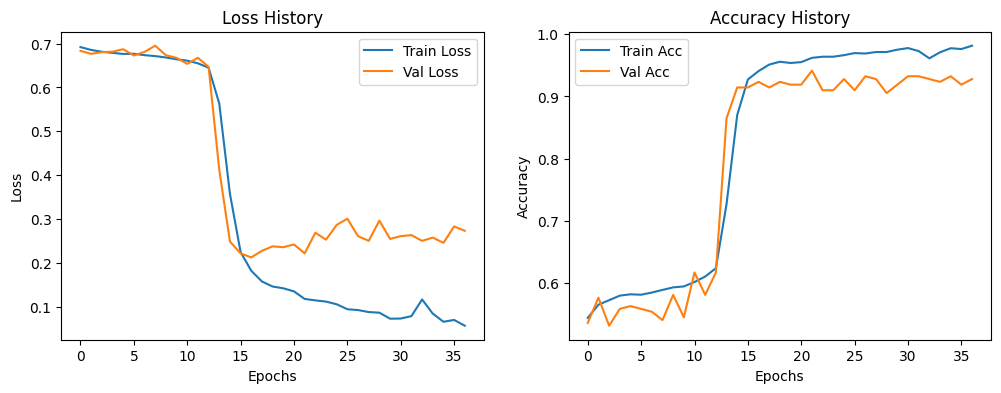

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, save_dir='checkpoints', early_stop_patience=20):
    best_acc = 0.0
    best_loss=10000
    best_model_wts = model.state_dict()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    no_improvement_epochs = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            data_loader = train_loader if phase == 'train' else val_loader
            total_samples = 0

            for inputs, labels in tqdm(data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                total_samples += labels.size(0)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    # Since UnetPlusPlus returns only one output, unpack only main_output
                    main_output = model(inputs)
                    _, preds = torch.max(main_output, 1)
                    loss = criterion(main_output, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # Check for improvement in validation accuracy
            # if phase == 'val' and epoch_acc > best_acc:
            if phase == 'val' and epoch_loss < best_loss:

                print(f"Validation loss improved from {best_loss:.4f} to {epoch_loss:.4f}, saving checkpoint...")
                # best_acc = epoch_acc
                best_loss = epoch_loss
                best_model_wts = model.state_dict()
                no_improvement_epochs = 0
                torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
            elif phase == 'val':
                no_improvement_epochs += 1

        # Early stopping
        if no_improvement_epochs >= early_stop_patience:
            print("Early stopping due to no improvement in validation accuracy.")
            break

    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history


def plot_history(history):
    epochs = len(history['train_loss'])
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.title('Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['train_acc'], label='Train Acc')
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.title('Accuracy History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import numpy as np

class StructuredFlipAugmentation:
    def __init__(self, include_brightness_contrast=False, include_jitter=False):
        self.horizontal_flip = transforms.RandomHorizontalFlip(p=1.0)
        self.vertical_flip = transforms.RandomVerticalFlip(p=1.0)
        self.include_brightness_contrast = include_brightness_contrast
        self.include_jitter = include_jitter
        self.jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
        self.gaussian_noise = lambda img: img + torch.randn(img.size()) * 0.1  # Add Gaussian noise

        if include_brightness_contrast:
            self.brightness_contrast = transforms.ColorJitter(brightness=0.2, contrast=0.2)

    def apply_flips(self, img):
        augmented = [
            img,  # Original image
            self.vertical_flip(img),  # Vertically flipped
            self.horizontal_flip(img),  # Horizontally flipped
            self.vertical_flip(self.horizontal_flip(img))  # Both vertical and horizontal flipped
        ]
        return augmented

    def apply_brightness_contrast(self, augmented_images):
        return [self.brightness_contrast(img) for img in augmented_images]

    def apply_jitter(self, augmented_images):
        return [self.jitter(img) for img in augmented_images]

    def __call__(self, img, augmentation_type='flip'):
        augmented = self.apply_flips(img)

        if augmentation_type == 'fully' and self.include_brightness_contrast:
            brightness_contrast_augmented = self.apply_brightness_contrast(augmented)
            augmented.extend(brightness_contrast_augmented)

        if self.include_jitter:
            jitter_augmented = self.apply_jitter(augmented)
            augmented.extend(jitter_augmented)

        return augmented


class SolarCellDataset(Dataset):
    def __init__(self, dataframe, transform=None, augmentation='none'):
        self.dataframe = dataframe
        self.transform = transform
        self.augmentation = augmentation
        self.flip_aug = StructuredFlipAugmentation(include_brightness_contrast=(augmentation == 'fully'),
                                                   include_jitter=(augmentation == 'jitter'))

    def __len__(self):
        if self.augmentation == 'none':
            return len(self.dataframe)
        elif self.augmentation == 'flip':
            return len(self.dataframe) * 4  # Original + 3 flips
        elif self.augmentation == 'fully':
            return len(self.dataframe) * 8  # Flip (4x) + Brightness/Contrast (4x)
        elif self.augmentation == 'jitter':
            return len(self.dataframe) * 12  # Add jitter to fully augmented data

    def __getitem__(self, idx):
        # Find the index of the original image in the dataframe
        original_idx = idx % len(self.dataframe)  # Wrap idx around the length of original dataset
        img_path = self.dataframe.iloc[original_idx, 0]  # Assuming 'file_path' is the first column
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = self.dataframe.iloc[original_idx, 1]  # Assuming 'LABEL' is the second column

        if self.augmentation != 'none':
            # Apply structured flipping and (optionally) brightness/contrast augmentation
            augmented_images = self.flip_aug(image, augmentation_type=self.augmentation)
            image = augmented_images[idx % len(augmented_images)]

            # image = augmented_images[idx // len(self.dataframe)]  # Select the corresponding augmented image

        if self.transform:
            image = self.transform(image)

        return image, label


# Load and preprocess data
transformed_df = pd.read_csv('transformed_data.csv')



# Use undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(transformed_df[['file_path']], transformed_df['LABEL'])
balanced_df = pd.DataFrame({'file_path': X_resampled['file_path'], 'LABEL': y_resampled})
train_df, eval_df = train_test_split(balanced_df, test_size=0.15, random_state=42, stratify=balanced_df['LABEL'])
criterion = nn.CrossEntropyLoss()


transform = transforms.Compose([
    transforms.Resize((608, 128)),  # Adjust dimensions if necessary
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize the grayscale image
])

train_dataset = SolarCellDataset(dataframe=train_df, transform=transform, augmentation='jitter')
eval_dataset = SolarCellDataset(dataframe=eval_df, transform=transform, augmentation='none')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

class SolarCellCrackDetector(nn.Module):
    def __init__(self, num_classes=2):
        super(SolarCellCrackDetector, self).__init__()
        self.model = CustomCNN(num_classes=num_classes)

    def forward(self, x):
        return self.model(x)

class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=7, stride=1, padding=3),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Dropout(0.3)
        )

        self.fc = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


# Instantiate the model
model = SolarCellCrackDetector(num_classes=2).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  # L2 regularization

# Create checkpoints directory if it doesn't exist
if not os.path.exists('checkpoints'):
    os.makedirs('checkpoints')

# Train the model
trained_model, history = train_model(model, train_loader, eval_loader, criterion, optimizer, num_epochs, device)

# Plot the training history
plot_history(history)

# Save the final model
torch.save(trained_model.state_dict(), 'solar_cell_crack_detector_final1.pth')

In [ ]:
batch_size=16

model 4

Epoch 1/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.37it/s]


train Loss: 0.6927 Acc: 0.5332


100%|██████████| 56/56 [00:01<00:00, 30.82it/s]


val Loss: 0.6921 Acc: 0.5191
Validation loss improved from 10000.0000 to 0.6921, saving checkpoint...
Epoch 2/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.36it/s]


train Loss: 0.6892 Acc: 0.5385


100%|██████████| 56/56 [00:01<00:00, 30.36it/s]


val Loss: 0.6959 Acc: 0.5034
Epoch 3/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.22it/s]


train Loss: 0.6889 Acc: 0.5425


100%|██████████| 56/56 [00:01<00:00, 30.83it/s]


val Loss: 0.6890 Acc: 0.5495
Validation loss improved from 0.6921 to 0.6890, saving checkpoint...
Epoch 4/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.31it/s]


train Loss: 0.6874 Acc: 0.5551


100%|██████████| 56/56 [00:01<00:00, 29.60it/s]


val Loss: 0.6951 Acc: 0.5169
Epoch 5/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.70it/s]


train Loss: 0.6861 Acc: 0.5559


100%|██████████| 56/56 [00:01<00:00, 30.17it/s]


val Loss: 0.6876 Acc: 0.5484
Validation loss improved from 0.6890 to 0.6876, saving checkpoint...
Epoch 6/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.60it/s]


train Loss: 0.6849 Acc: 0.5637


100%|██████████| 56/56 [00:01<00:00, 29.00it/s]


val Loss: 0.6910 Acc: 0.5293
Epoch 7/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.84it/s]


train Loss: 0.6840 Acc: 0.5640


100%|██████████| 56/56 [00:01<00:00, 29.13it/s]


val Loss: 0.6906 Acc: 0.5394
Epoch 8/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.84it/s]


train Loss: 0.6824 Acc: 0.5732


100%|██████████| 56/56 [00:02<00:00, 26.72it/s]


val Loss: 0.6880 Acc: 0.5428
Epoch 9/100
----------


100%|██████████| 942/942 [00:32<00:00, 29.32it/s]


train Loss: 0.6809 Acc: 0.5738


100%|██████████| 56/56 [00:01<00:00, 28.18it/s]


val Loss: 0.6853 Acc: 0.5597
Validation loss improved from 0.6876 to 0.6853, saving checkpoint...
Epoch 10/100
----------


100%|██████████| 942/942 [00:32<00:00, 29.36it/s]


train Loss: 0.6793 Acc: 0.5740


100%|██████████| 56/56 [00:01<00:00, 28.98it/s]


val Loss: 0.6874 Acc: 0.5462
Epoch 11/100
----------


100%|██████████| 942/942 [00:30<00:00, 31.39it/s]


train Loss: 0.6807 Acc: 0.5698


100%|██████████| 56/56 [00:01<00:00, 29.51it/s]


val Loss: 0.6890 Acc: 0.5349
Epoch 12/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.23it/s]


train Loss: 0.6780 Acc: 0.5794


100%|██████████| 56/56 [00:01<00:00, 29.84it/s]


val Loss: 0.6878 Acc: 0.5484
Epoch 13/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.77it/s]


train Loss: 0.6781 Acc: 0.5766


100%|██████████| 56/56 [00:01<00:00, 29.58it/s]


val Loss: 0.6913 Acc: 0.5473
Epoch 14/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.93it/s]


train Loss: 0.6765 Acc: 0.5809


100%|██████████| 56/56 [00:01<00:00, 29.17it/s]


val Loss: 0.6765 Acc: 0.5507
Validation loss improved from 0.6853 to 0.6765, saving checkpoint...
Epoch 15/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.81it/s]


train Loss: 0.6764 Acc: 0.5795


100%|██████████| 56/56 [00:01<00:00, 29.77it/s]


val Loss: 0.6798 Acc: 0.5676
Epoch 16/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.44it/s]


train Loss: 0.6757 Acc: 0.5824


100%|██████████| 56/56 [00:01<00:00, 29.61it/s]


val Loss: 0.6792 Acc: 0.5439
Epoch 17/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.88it/s]


train Loss: 0.6759 Acc: 0.5811


100%|██████████| 56/56 [00:01<00:00, 29.81it/s]


val Loss: 0.6807 Acc: 0.5383
Epoch 18/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.72it/s]


train Loss: 0.6731 Acc: 0.5853


100%|██████████| 56/56 [00:01<00:00, 29.80it/s]


val Loss: 0.6846 Acc: 0.5428
Epoch 19/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.90it/s]


train Loss: 0.6741 Acc: 0.5782


100%|██████████| 56/56 [00:01<00:00, 29.21it/s]


val Loss: 0.6838 Acc: 0.5439
Epoch 20/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.74it/s]


train Loss: 0.6737 Acc: 0.5833


100%|██████████| 56/56 [00:01<00:00, 30.08it/s]


val Loss: 0.7071 Acc: 0.5462
Epoch 21/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.85it/s]


train Loss: 0.6752 Acc: 0.5774


100%|██████████| 56/56 [00:01<00:00, 30.09it/s]


val Loss: 0.6804 Acc: 0.5597
Epoch 22/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.72it/s]


train Loss: 0.6728 Acc: 0.5860


100%|██████████| 56/56 [00:01<00:00, 30.11it/s]


val Loss: 0.6800 Acc: 0.5495
Epoch 23/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.97it/s]


train Loss: 0.6715 Acc: 0.5848


100%|██████████| 56/56 [00:01<00:00, 29.88it/s]


val Loss: 0.6756 Acc: 0.5473
Validation loss improved from 0.6765 to 0.6756, saving checkpoint...
Epoch 24/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.68it/s]


train Loss: 0.6708 Acc: 0.5854


100%|██████████| 56/56 [00:01<00:00, 29.50it/s]


val Loss: 0.6780 Acc: 0.5349
Epoch 25/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.64it/s]


train Loss: 0.6699 Acc: 0.5890


100%|██████████| 56/56 [00:01<00:00, 29.27it/s]


val Loss: 0.6788 Acc: 0.5439
Epoch 26/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.43it/s]


train Loss: 0.6694 Acc: 0.5902


100%|██████████| 56/56 [00:01<00:00, 30.69it/s]


val Loss: 0.6803 Acc: 0.5439
Epoch 27/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.63it/s]


train Loss: 0.6691 Acc: 0.5894


100%|██████████| 56/56 [00:01<00:00, 30.32it/s]


val Loss: 0.6832 Acc: 0.5293
Epoch 28/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.59it/s]


train Loss: 0.6690 Acc: 0.5872


100%|██████████| 56/56 [00:01<00:00, 28.99it/s]


val Loss: 0.6818 Acc: 0.5439
Epoch 29/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.99it/s]


train Loss: 0.6688 Acc: 0.5906


100%|██████████| 56/56 [00:01<00:00, 29.87it/s]


val Loss: 0.6782 Acc: 0.5586
Epoch 30/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.86it/s]


train Loss: 0.6691 Acc: 0.5876


100%|██████████| 56/56 [00:01<00:00, 29.90it/s]


val Loss: 0.6800 Acc: 0.5293
Epoch 31/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.86it/s]


train Loss: 0.6685 Acc: 0.5929


100%|██████████| 56/56 [00:01<00:00, 29.91it/s]


val Loss: 0.6773 Acc: 0.5507
Epoch 32/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.78it/s]


train Loss: 0.6650 Acc: 0.6034


100%|██████████| 56/56 [00:01<00:00, 30.23it/s]


val Loss: 0.6843 Acc: 0.5507
Epoch 33/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.89it/s]


train Loss: 0.6645 Acc: 0.5944


100%|██████████| 56/56 [00:01<00:00, 28.89it/s]


val Loss: 0.6852 Acc: 0.5462
Epoch 34/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.06it/s]


train Loss: 0.6638 Acc: 0.6001


100%|██████████| 56/56 [00:01<00:00, 30.29it/s]


val Loss: 0.6839 Acc: 0.5484
Epoch 35/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.02it/s]


train Loss: 0.6624 Acc: 0.5975


100%|██████████| 56/56 [00:01<00:00, 29.81it/s]


val Loss: 0.6935 Acc: 0.5417
Epoch 36/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.73it/s]


train Loss: 0.6602 Acc: 0.6036


100%|██████████| 56/56 [00:01<00:00, 30.51it/s]


val Loss: 0.6741 Acc: 0.5642
Validation loss improved from 0.6756 to 0.6741, saving checkpoint...
Epoch 37/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.97it/s]


train Loss: 0.6576 Acc: 0.6028


100%|██████████| 56/56 [00:01<00:00, 30.00it/s]


val Loss: 0.6920 Acc: 0.5327
Epoch 38/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.84it/s]


train Loss: 0.6580 Acc: 0.6052


100%|██████████| 56/56 [00:01<00:00, 29.41it/s]


val Loss: 0.6672 Acc: 0.5822
Validation loss improved from 0.6741 to 0.6672, saving checkpoint...
Epoch 39/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.07it/s]


train Loss: 0.6458 Acc: 0.6248


100%|██████████| 56/56 [00:01<00:00, 30.50it/s]


val Loss: 0.6788 Acc: 0.5642
Epoch 40/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.00it/s]


train Loss: 0.6289 Acc: 0.6465


100%|██████████| 56/56 [00:01<00:00, 29.44it/s]


val Loss: 0.6223 Acc: 0.6543
Validation loss improved from 0.6672 to 0.6223, saving checkpoint...
Epoch 41/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.08it/s]


train Loss: 0.5720 Acc: 0.7215


100%|██████████| 56/56 [00:01<00:00, 29.71it/s]


val Loss: 0.5383 Acc: 0.7680
Validation loss improved from 0.6223 to 0.5383, saving checkpoint...
Epoch 42/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.98it/s]


train Loss: 0.4777 Acc: 0.8096


100%|██████████| 56/56 [00:01<00:00, 29.58it/s]


val Loss: 0.4358 Acc: 0.8345
Validation loss improved from 0.5383 to 0.4358, saving checkpoint...
Epoch 43/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.98it/s]


train Loss: 0.3699 Acc: 0.8749


100%|██████████| 56/56 [00:01<00:00, 29.57it/s]


val Loss: 0.3819 Acc: 0.8615
Validation loss improved from 0.4358 to 0.3819, saving checkpoint...
Epoch 44/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.81it/s]


train Loss: 0.2869 Acc: 0.9057


100%|██████████| 56/56 [00:01<00:00, 28.54it/s]


val Loss: 0.3142 Acc: 0.8941
Validation loss improved from 0.3819 to 0.3142, saving checkpoint...
Epoch 45/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.99it/s]


train Loss: 0.2333 Acc: 0.9244


100%|██████████| 56/56 [00:01<00:00, 29.47it/s]


val Loss: 0.3081 Acc: 0.9009
Validation loss improved from 0.3142 to 0.3081, saving checkpoint...
Epoch 46/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.64it/s]


train Loss: 0.2055 Acc: 0.9320


100%|██████████| 56/56 [00:01<00:00, 29.79it/s]


val Loss: 0.3087 Acc: 0.9054
Epoch 47/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.62it/s]


train Loss: 0.1863 Acc: 0.9400


100%|██████████| 56/56 [00:01<00:00, 28.81it/s]


val Loss: 0.3257 Acc: 0.9200
Epoch 48/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.83it/s]


train Loss: 0.1719 Acc: 0.9445


100%|██████████| 56/56 [00:01<00:00, 29.72it/s]


val Loss: 0.2690 Acc: 0.9200
Validation loss improved from 0.3081 to 0.2690, saving checkpoint...
Epoch 49/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.84it/s]


train Loss: 0.1570 Acc: 0.9496


100%|██████████| 56/56 [00:01<00:00, 28.97it/s]


val Loss: 0.2892 Acc: 0.9088
Epoch 50/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.70it/s]


train Loss: 0.1523 Acc: 0.9498


100%|██████████| 56/56 [00:01<00:00, 29.46it/s]


val Loss: 0.2713 Acc: 0.9223
Epoch 51/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.02it/s]


train Loss: 0.1441 Acc: 0.9532


100%|██████████| 56/56 [00:01<00:00, 29.20it/s]


val Loss: 0.2757 Acc: 0.9189
Epoch 52/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.62it/s]


train Loss: 0.1384 Acc: 0.9559


100%|██████████| 56/56 [00:01<00:00, 30.15it/s]


val Loss: 0.2713 Acc: 0.9279
Epoch 53/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.91it/s]


train Loss: 0.1416 Acc: 0.9551


100%|██████████| 56/56 [00:01<00:00, 29.31it/s]


val Loss: 0.2717 Acc: 0.9212
Epoch 54/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.82it/s]


train Loss: 0.1270 Acc: 0.9588


100%|██████████| 56/56 [00:01<00:00, 29.60it/s]


val Loss: 0.3185 Acc: 0.9155
Epoch 55/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.80it/s]


train Loss: 0.1367 Acc: 0.9565


100%|██████████| 56/56 [00:01<00:00, 29.85it/s]


val Loss: 0.2624 Acc: 0.9268
Validation loss improved from 0.2690 to 0.2624, saving checkpoint...
Epoch 56/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.82it/s]


train Loss: 0.1173 Acc: 0.9627


100%|██████████| 56/56 [00:01<00:00, 29.24it/s]


val Loss: 0.2665 Acc: 0.9324
Epoch 57/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.93it/s]


train Loss: 0.1168 Acc: 0.9632


100%|██████████| 56/56 [00:01<00:00, 29.66it/s]


val Loss: 0.2740 Acc: 0.9291
Epoch 58/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.87it/s]


train Loss: 0.1150 Acc: 0.9623


100%|██████████| 56/56 [00:01<00:00, 29.64it/s]


val Loss: 0.2709 Acc: 0.9279
Epoch 59/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.72it/s]


train Loss: 0.1097 Acc: 0.9640


100%|██████████| 56/56 [00:01<00:00, 30.05it/s]


val Loss: 0.2949 Acc: 0.9200
Epoch 60/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.71it/s]


train Loss: 0.1023 Acc: 0.9681


100%|██████████| 56/56 [00:01<00:00, 29.25it/s]


val Loss: 0.2935 Acc: 0.9200
Epoch 61/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.84it/s]


train Loss: 0.0999 Acc: 0.9665


100%|██████████| 56/56 [00:01<00:00, 29.36it/s]


val Loss: 0.3246 Acc: 0.9178
Epoch 62/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.83it/s]


train Loss: 0.1031 Acc: 0.9654


100%|██████████| 56/56 [00:01<00:00, 29.84it/s]


val Loss: 0.2673 Acc: 0.9302
Epoch 63/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.87it/s]


train Loss: 0.0947 Acc: 0.9679


100%|██████████| 56/56 [00:01<00:00, 30.03it/s]


val Loss: 0.2820 Acc: 0.9279
Epoch 64/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.73it/s]


train Loss: 0.0943 Acc: 0.9682


100%|██████████| 56/56 [00:01<00:00, 29.87it/s]


val Loss: 0.2623 Acc: 0.9302
Validation loss improved from 0.2624 to 0.2623, saving checkpoint...
Epoch 65/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.91it/s]


train Loss: 0.0894 Acc: 0.9704


100%|██████████| 56/56 [00:01<00:00, 29.36it/s]


val Loss: 0.2888 Acc: 0.9223
Epoch 66/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.84it/s]


train Loss: 0.0880 Acc: 0.9721


100%|██████████| 56/56 [00:01<00:00, 29.65it/s]


val Loss: 0.2971 Acc: 0.9189
Epoch 67/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.73it/s]


train Loss: 0.0817 Acc: 0.9731


100%|██████████| 56/56 [00:01<00:00, 29.95it/s]


val Loss: 0.2827 Acc: 0.9257
Epoch 68/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.74it/s]


train Loss: 0.0860 Acc: 0.9717


100%|██████████| 56/56 [00:01<00:00, 29.97it/s]


val Loss: 0.2767 Acc: 0.9245
Epoch 69/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.95it/s]


train Loss: 0.0779 Acc: 0.9745


100%|██████████| 56/56 [00:01<00:00, 30.17it/s]


val Loss: 0.3159 Acc: 0.9065
Epoch 70/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.88it/s]


train Loss: 0.0764 Acc: 0.9756


100%|██████████| 56/56 [00:01<00:00, 28.79it/s]


val Loss: 0.2977 Acc: 0.9245
Epoch 71/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.07it/s]


train Loss: 0.0747 Acc: 0.9751


100%|██████████| 56/56 [00:01<00:00, 29.95it/s]


val Loss: 0.3471 Acc: 0.9178
Epoch 72/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.18it/s]


train Loss: 0.0744 Acc: 0.9757


100%|██████████| 56/56 [00:01<00:00, 28.79it/s]


val Loss: 0.3076 Acc: 0.9257
Epoch 73/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.03it/s]


train Loss: 0.0777 Acc: 0.9735


100%|██████████| 56/56 [00:02<00:00, 27.77it/s]


val Loss: 0.2856 Acc: 0.9279
Epoch 74/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.76it/s]


train Loss: 0.0869 Acc: 0.9707


100%|██████████| 56/56 [00:02<00:00, 27.63it/s]


val Loss: 0.2937 Acc: 0.9200
Epoch 75/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.15it/s]


train Loss: 0.0677 Acc: 0.9783


100%|██████████| 56/56 [00:01<00:00, 28.06it/s]


val Loss: 0.3223 Acc: 0.9257
Epoch 76/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.23it/s]


train Loss: 0.0650 Acc: 0.9781


100%|██████████| 56/56 [00:02<00:00, 27.87it/s]


val Loss: 0.3260 Acc: 0.9200
Epoch 77/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.92it/s]


train Loss: 0.0714 Acc: 0.9764


100%|██████████| 56/56 [00:01<00:00, 28.92it/s]


val Loss: 0.2944 Acc: 0.9245
Epoch 78/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.00it/s]


train Loss: 0.0629 Acc: 0.9790


100%|██████████| 56/56 [00:01<00:00, 28.68it/s]


val Loss: 0.2902 Acc: 0.9178
Epoch 79/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.97it/s]


train Loss: 0.0611 Acc: 0.9789


100%|██████████| 56/56 [00:01<00:00, 28.54it/s]


val Loss: 0.3163 Acc: 0.9155
Epoch 80/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.07it/s]


train Loss: 0.0806 Acc: 0.9725


100%|██████████| 56/56 [00:01<00:00, 28.19it/s]


val Loss: 0.3076 Acc: 0.9155
Epoch 81/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.89it/s]


train Loss: 0.0595 Acc: 0.9798


100%|██████████| 56/56 [00:01<00:00, 28.01it/s]


val Loss: 0.2947 Acc: 0.9313
Epoch 82/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.03it/s]


train Loss: 0.0573 Acc: 0.9798


100%|██████████| 56/56 [00:01<00:00, 28.59it/s]


val Loss: 0.3078 Acc: 0.9268
Epoch 83/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.00it/s]


train Loss: 0.0503 Acc: 0.9826


100%|██████████| 56/56 [00:01<00:00, 28.95it/s]


val Loss: 0.3242 Acc: 0.9144
Epoch 84/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.13it/s]


train Loss: 0.0561 Acc: 0.9810


100%|██████████| 56/56 [00:01<00:00, 28.46it/s]


val Loss: 0.3147 Acc: 0.9212
Early stopping due to no improvement in validation accuracy.
Best val Acc: 0.0000


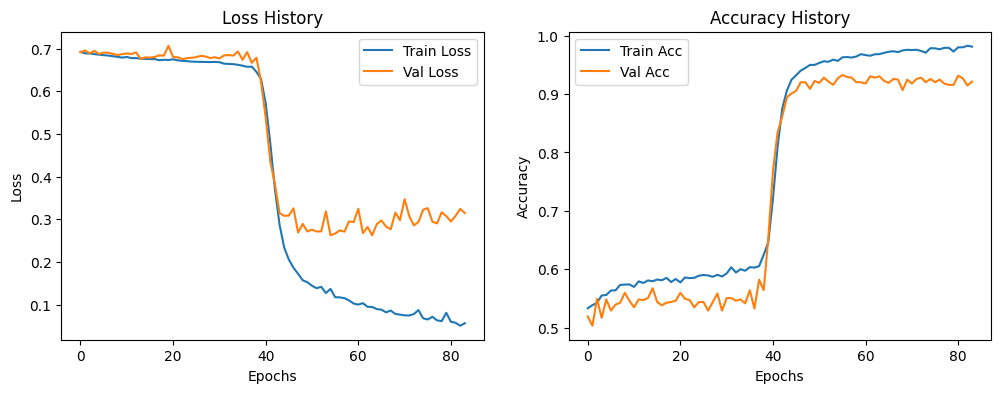

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, save_dir='checkpoints', early_stop_patience=20):
    best_acc = 0.0
    best_loss=10000
    best_model_wts = model.state_dict()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    no_improvement_epochs = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            data_loader = train_loader if phase == 'train' else val_loader
            total_samples = 0

            for inputs, labels in tqdm(data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                total_samples += labels.size(0)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    # Since UnetPlusPlus returns only one output, unpack only main_output
                    main_output = model(inputs)
                    _, preds = torch.max(main_output, 1)
                    loss = criterion(main_output, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # Check for improvement in validation accuracy
            # if phase == 'val' and epoch_acc > best_acc:
            if phase == 'val' and epoch_loss < best_loss:

                print(f"Validation loss improved from {best_loss:.4f} to {epoch_loss:.4f}, saving checkpoint...")
                # best_acc = epoch_acc
                best_loss = epoch_loss
                best_model_wts = model.state_dict()
                no_improvement_epochs = 0
                torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
            elif phase == 'val':
                no_improvement_epochs += 1

        # Early stopping
        if no_improvement_epochs >= early_stop_patience:
            print("Early stopping due to no improvement in validation accuracy.")
            break

    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history


def plot_history(history):
    epochs = len(history['train_loss'])
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.title('Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['train_acc'], label='Train Acc')
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.title('Accuracy History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import numpy as np
from torch.optim import AdamW  # Importing AdamW optimizer

class StructuredFlipAugmentation:
    def __init__(self, include_brightness_contrast=False, include_jitter=False):
        self.horizontal_flip = transforms.RandomHorizontalFlip(p=1.0)
        self.vertical_flip = transforms.RandomVerticalFlip(p=1.0)
        self.include_brightness_contrast = include_brightness_contrast
        self.include_jitter = include_jitter
        self.jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
        self.gaussian_noise = lambda img: img + torch.randn(img.size()) * 0.1  # Add Gaussian noise

        if include_brightness_contrast:
            self.brightness_contrast = transforms.ColorJitter(brightness=0.2, contrast=0.2)

    def apply_flips(self, img):
        augmented = [
            img,  # Original image
            self.vertical_flip(img),  # Vertically flipped
            self.horizontal_flip(img),  # Horizontally flipped
            self.vertical_flip(self.horizontal_flip(img))  # Both vertical and horizontal flipped
        ]
        return augmented

    def apply_brightness_contrast(self, augmented_images):
        return [self.brightness_contrast(img) for img in augmented_images]

    def apply_jitter(self, augmented_images):
        return [self.jitter(img) for img in augmented_images]

    def __call__(self, img, augmentation_type='flip'):
        augmented = self.apply_flips(img)

        if augmentation_type == 'fully' and self.include_brightness_contrast:
            brightness_contrast_augmented = self.apply_brightness_contrast(augmented)
            augmented.extend(brightness_contrast_augmented)

        if self.include_jitter:
            jitter_augmented = self.apply_jitter(augmented)
            augmented.extend(jitter_augmented)

        return augmented


class SolarCellDataset(Dataset):
    def __init__(self, dataframe, transform=None, augmentation='none'):
        self.dataframe = dataframe
        self.transform = transform
        self.augmentation = augmentation
        self.flip_aug = StructuredFlipAugmentation(include_brightness_contrast=(augmentation == 'fully'),
                                                   include_jitter=(augmentation == 'jitter'))

    def __len__(self):
        if self.augmentation == 'none':
            return len(self.dataframe)
        elif self.augmentation == 'flip':
            return len(self.dataframe) * 4  # Original + 3 flips
        elif self.augmentation == 'fully':
            return len(self.dataframe) * 8  # Flip (4x) + Brightness/Contrast (4x)
        elif self.augmentation == 'jitter':
            return len(self.dataframe) * 12  # Add jitter to fully augmented data

    def __getitem__(self, idx):
        # Find the index of the original image in the dataframe
        original_idx = idx % len(self.dataframe)  # Wrap idx around the length of original dataset
        img_path = self.dataframe.iloc[original_idx, 0]  # Assuming 'file_path' is the first column
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = self.dataframe.iloc[original_idx, 1]  # Assuming 'LABEL' is the second column

        if self.augmentation != 'none':
            # Apply structured flipping and (optionally) brightness/contrast augmentation
            augmented_images = self.flip_aug(image, augmentation_type=self.augmentation)
            image = augmented_images[idx % len(augmented_images)]

            # image = augmented_images[idx // len(self.dataframe)]  # Select the corresponding augmented image

        if self.transform:
            image = self.transform(image)

        return image, label


# Load and preprocess data
transformed_df = pd.read_csv('transformed_data.csv')



# Use undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(transformed_df[['file_path']], transformed_df['LABEL'])
balanced_df = pd.DataFrame({'file_path': X_resampled['file_path'], 'LABEL': y_resampled})
train_df, eval_df = train_test_split(balanced_df, test_size=0.15, random_state=42, stratify=balanced_df['LABEL'])
criterion = nn.CrossEntropyLoss()


transform = transforms.Compose([
    transforms.Resize((608, 128)),  # Adjust dimensions if necessary
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize the grayscale image
])



train_dataset = SolarCellDataset(dataframe=train_df, transform=transform, augmentation='jitter')
eval_dataset = SolarCellDataset(dataframe=eval_df, transform=transform, augmentation='flip')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

class SolarCellCrackDetector(nn.Module):
    def __init__(self, num_classes=2):
        super(SolarCellCrackDetector, self).__init__()
        self.model = CustomCNN(num_classes=num_classes)

    def forward(self, x):
        return self.model(x)


class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=9, stride=1, padding=3),  # First layer with kernel size 7
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=7, stride=1, padding=2),  # Second layer with kernel size 5
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=1),  # Third layer with kernel size 3
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        # Removed the fourth convolutional layer
        # The adaptive pooling is applied directly in the forward method after conv3

        self.fc = nn.Sequential(
            nn.Linear(64, 32),  # Adjusted input size for the first fully connected layer
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = nn.AdaptiveAvgPool2d((1, 1))(x)  # Adaptive pooling after the last conv layer
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)
        return x


# Instantiate the model
model = SolarCellCrackDetector(num_classes=2).to(device)
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# Create checkpoints directory if it doesn't exist
if not os.path.exists('checkpoints'):
    os.makedirs('checkpoints')

# Train the model
trained_model, history = train_model(model, train_loader, eval_loader, criterion, optimizer, num_epochs, device)

# Plot the training history
plot_history(history)

# Save the final model
torch.save(trained_model.state_dict(), 'solar_cell_crack_detector_final4.pth')

Epoch 1/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.00it/s]


train Loss: 0.6923 Acc: 0.5403


100%|██████████| 56/56 [00:01<00:00, 29.20it/s]


val Loss: 0.6976 Acc: 0.5236
Validation loss improved from 10000.0000 to 0.6976, saving checkpoint...
Epoch 2/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.08it/s]


train Loss: 0.6876 Acc: 0.5527


100%|██████████| 56/56 [00:01<00:00, 29.79it/s]


val Loss: 0.6912 Acc: 0.5124
Validation loss improved from 0.6976 to 0.6912, saving checkpoint...
Epoch 3/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.12it/s]


train Loss: 0.6856 Acc: 0.5604


100%|██████████| 56/56 [00:01<00:00, 30.24it/s]


val Loss: 0.6882 Acc: 0.5304
Validation loss improved from 0.6912 to 0.6882, saving checkpoint...
Epoch 4/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.10it/s]


train Loss: 0.6844 Acc: 0.5621


100%|██████████| 56/56 [00:01<00:00, 28.21it/s]


val Loss: 0.6874 Acc: 0.5304
Validation loss improved from 0.6882 to 0.6874, saving checkpoint...
Epoch 5/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.15it/s]


train Loss: 0.6835 Acc: 0.5642


100%|██████████| 56/56 [00:01<00:00, 29.15it/s]


val Loss: 0.6777 Acc: 0.5833
Validation loss improved from 0.6874 to 0.6777, saving checkpoint...
Epoch 6/100
----------


100%|██████████| 942/942 [00:37<00:00, 24.89it/s]


train Loss: 0.6803 Acc: 0.5738


100%|██████████| 56/56 [00:02<00:00, 27.93it/s]


val Loss: 0.6886 Acc: 0.5338
Epoch 7/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.14it/s]


train Loss: 0.6780 Acc: 0.5813


100%|██████████| 56/56 [00:01<00:00, 29.86it/s]


val Loss: 0.6769 Acc: 0.5755
Validation loss improved from 0.6777 to 0.6769, saving checkpoint...
Epoch 8/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.13it/s]


train Loss: 0.6779 Acc: 0.5800


100%|██████████| 56/56 [00:01<00:00, 28.48it/s]


val Loss: 0.6787 Acc: 0.5687
Epoch 9/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.08it/s]


train Loss: 0.6778 Acc: 0.5800


100%|██████████| 56/56 [00:01<00:00, 29.61it/s]


val Loss: 0.6753 Acc: 0.6014
Validation loss improved from 0.6769 to 0.6753, saving checkpoint...
Epoch 10/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.13it/s]


train Loss: 0.6761 Acc: 0.5832


100%|██████████| 56/56 [00:01<00:00, 28.94it/s]


val Loss: 0.6768 Acc: 0.5811
Epoch 11/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.14it/s]


train Loss: 0.6756 Acc: 0.5817


100%|██████████| 56/56 [00:01<00:00, 29.14it/s]


val Loss: 0.6709 Acc: 0.6025
Validation loss improved from 0.6753 to 0.6709, saving checkpoint...
Epoch 12/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.16it/s]


train Loss: 0.6742 Acc: 0.5856


100%|██████████| 56/56 [00:01<00:00, 29.59it/s]


val Loss: 0.6747 Acc: 0.5935
Epoch 13/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.11it/s]


train Loss: 0.6717 Acc: 0.5867


100%|██████████| 56/56 [00:02<00:00, 27.65it/s]


val Loss: 0.6703 Acc: 0.5980
Validation loss improved from 0.6709 to 0.6703, saving checkpoint...
Epoch 14/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.11it/s]


train Loss: 0.6697 Acc: 0.5920


100%|██████████| 56/56 [00:01<00:00, 28.88it/s]


val Loss: 0.6688 Acc: 0.5957
Validation loss improved from 0.6703 to 0.6688, saving checkpoint...
Epoch 15/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.18it/s]


train Loss: 0.6701 Acc: 0.5916


100%|██████████| 56/56 [00:01<00:00, 28.62it/s]


val Loss: 0.6672 Acc: 0.6047
Validation loss improved from 0.6688 to 0.6672, saving checkpoint...
Epoch 16/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.10it/s]


train Loss: 0.6685 Acc: 0.5924


100%|██████████| 56/56 [00:01<00:00, 29.74it/s]


val Loss: 0.6769 Acc: 0.5698
Epoch 17/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.15it/s]


train Loss: 0.6673 Acc: 0.5917


100%|██████████| 56/56 [00:01<00:00, 28.52it/s]


val Loss: 0.6802 Acc: 0.5653
Epoch 18/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.16it/s]


train Loss: 0.6626 Acc: 0.5990


100%|██████████| 56/56 [00:01<00:00, 29.42it/s]


val Loss: 0.6823 Acc: 0.5845
Epoch 19/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.15it/s]


train Loss: 0.6587 Acc: 0.6070


100%|██████████| 56/56 [00:01<00:00, 29.01it/s]


val Loss: 0.6927 Acc: 0.5563
Epoch 20/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.12it/s]


train Loss: 0.6452 Acc: 0.6225


100%|██████████| 56/56 [00:01<00:00, 29.12it/s]


val Loss: 0.6637 Acc: 0.5946
Validation loss improved from 0.6672 to 0.6637, saving checkpoint...
Epoch 21/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.19it/s]


train Loss: 0.6023 Acc: 0.6829


100%|██████████| 56/56 [00:01<00:00, 29.70it/s]


val Loss: 0.9572 Acc: 0.6520
Epoch 22/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.17it/s]


train Loss: 0.5092 Acc: 0.7783


100%|██████████| 56/56 [00:01<00:00, 28.20it/s]


val Loss: 0.4849 Acc: 0.8074
Validation loss improved from 0.6637 to 0.4849, saving checkpoint...
Epoch 23/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.18it/s]


train Loss: 0.4089 Acc: 0.8445


100%|██████████| 56/56 [00:01<00:00, 29.83it/s]


val Loss: 0.3993 Acc: 0.8514
Validation loss improved from 0.4849 to 0.3993, saving checkpoint...
Epoch 24/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.17it/s]


train Loss: 0.3391 Acc: 0.8731


100%|██████████| 56/56 [00:01<00:00, 28.35it/s]


val Loss: 0.4379 Acc: 0.8468
Epoch 25/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.10it/s]


train Loss: 0.2887 Acc: 0.8947


100%|██████████| 56/56 [00:01<00:00, 29.06it/s]


val Loss: 0.4857 Acc: 0.8592
Epoch 26/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.20it/s]


train Loss: 0.2658 Acc: 0.9055


100%|██████████| 56/56 [00:01<00:00, 29.39it/s]


val Loss: 0.2974 Acc: 0.9020
Validation loss improved from 0.3993 to 0.2974, saving checkpoint...
Epoch 27/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.14it/s]


train Loss: 0.2403 Acc: 0.9133


100%|██████████| 56/56 [00:01<00:00, 29.41it/s]


val Loss: 0.3524 Acc: 0.8840
Epoch 28/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.16it/s]


train Loss: 0.2224 Acc: 0.9199


100%|██████████| 56/56 [00:01<00:00, 29.95it/s]


val Loss: 0.3035 Acc: 0.8919
Epoch 29/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.19it/s]


train Loss: 0.2092 Acc: 0.9256


100%|██████████| 56/56 [00:01<00:00, 28.08it/s]


val Loss: 0.2732 Acc: 0.9155
Validation loss improved from 0.2974 to 0.2732, saving checkpoint...
Epoch 30/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.11it/s]


train Loss: 0.2020 Acc: 0.9284


100%|██████████| 56/56 [00:01<00:00, 29.38it/s]


val Loss: 0.3550 Acc: 0.8964
Epoch 31/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.11it/s]


train Loss: 0.1952 Acc: 0.9307


100%|██████████| 56/56 [00:01<00:00, 28.17it/s]


val Loss: 0.6084 Acc: 0.8682
Epoch 32/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.14it/s]


train Loss: 0.1910 Acc: 0.9322


100%|██████████| 56/56 [00:01<00:00, 29.91it/s]


val Loss: 0.2934 Acc: 0.9009
Epoch 33/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.14it/s]


train Loss: 0.1739 Acc: 0.9385


100%|██████████| 56/56 [00:01<00:00, 28.42it/s]


val Loss: 0.2956 Acc: 0.9212
Epoch 34/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.15it/s]


train Loss: 0.1718 Acc: 0.9394


100%|██████████| 56/56 [00:01<00:00, 28.52it/s]


val Loss: 0.2790 Acc: 0.9133
Epoch 35/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.16it/s]


train Loss: 0.1647 Acc: 0.9422


100%|██████████| 56/56 [00:01<00:00, 29.77it/s]


val Loss: 0.2797 Acc: 0.9133
Epoch 36/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.16it/s]


train Loss: 0.1600 Acc: 0.9451


100%|██████████| 56/56 [00:02<00:00, 27.87it/s]


val Loss: 0.2900 Acc: 0.9268
Epoch 37/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.12it/s]


train Loss: 0.1527 Acc: 0.9478


100%|██████████| 56/56 [00:01<00:00, 28.89it/s]


val Loss: 0.2944 Acc: 0.9189
Epoch 38/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.04it/s]


train Loss: 0.1502 Acc: 0.9474


100%|██████████| 56/56 [00:02<00:00, 27.25it/s]


val Loss: 0.2860 Acc: 0.9065
Epoch 39/100
----------


100%|██████████| 942/942 [00:37<00:00, 24.98it/s]


train Loss: 0.1468 Acc: 0.9477


100%|██████████| 56/56 [00:01<00:00, 29.57it/s]


val Loss: 0.2692 Acc: 0.9178
Validation loss improved from 0.2732 to 0.2692, saving checkpoint...
Epoch 40/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.03it/s]


train Loss: 0.1405 Acc: 0.9526


100%|██████████| 56/56 [00:02<00:00, 26.12it/s]


val Loss: 0.2902 Acc: 0.9200
Epoch 41/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.01it/s]


train Loss: 0.1372 Acc: 0.9509


100%|██████████| 56/56 [00:01<00:00, 29.58it/s]


val Loss: 0.2938 Acc: 0.9245
Epoch 42/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.06it/s]


train Loss: 0.1254 Acc: 0.9551


100%|██████████| 56/56 [00:01<00:00, 29.76it/s]


val Loss: 0.2778 Acc: 0.9245
Epoch 43/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.11it/s]


train Loss: 0.1224 Acc: 0.9586


100%|██████████| 56/56 [00:01<00:00, 29.00it/s]


val Loss: 0.3158 Acc: 0.9099
Epoch 44/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.13it/s]


train Loss: 0.1264 Acc: 0.9546


100%|██████████| 56/56 [00:01<00:00, 28.71it/s]


val Loss: 0.3360 Acc: 0.9110
Epoch 45/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.14it/s]


train Loss: 0.1187 Acc: 0.9590


100%|██████████| 56/56 [00:01<00:00, 29.01it/s]


val Loss: 0.3314 Acc: 0.9122
Epoch 46/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.20it/s]


train Loss: 0.1170 Acc: 0.9593


100%|██████████| 56/56 [00:01<00:00, 29.69it/s]


val Loss: 0.3133 Acc: 0.9257
Epoch 47/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.15it/s]


train Loss: 0.1128 Acc: 0.9597


100%|██████████| 56/56 [00:01<00:00, 29.95it/s]


val Loss: 0.3106 Acc: 0.9077
Epoch 48/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.17it/s]


train Loss: 0.1117 Acc: 0.9615


100%|██████████| 56/56 [00:02<00:00, 27.80it/s]


val Loss: 0.2922 Acc: 0.9189
Epoch 49/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.17it/s]


train Loss: 0.1081 Acc: 0.9623


100%|██████████| 56/56 [00:01<00:00, 29.01it/s]


val Loss: 0.3317 Acc: 0.9189
Epoch 50/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.17it/s]


train Loss: 0.1122 Acc: 0.9600


100%|██████████| 56/56 [00:01<00:00, 29.27it/s]


val Loss: 0.3332 Acc: 0.9133
Epoch 51/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.19it/s]


train Loss: 0.0952 Acc: 0.9670


100%|██████████| 56/56 [00:01<00:00, 29.82it/s]


val Loss: 0.3299 Acc: 0.9279
Epoch 52/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.14it/s]


train Loss: 0.0982 Acc: 0.9648


100%|██████████| 56/56 [00:01<00:00, 29.37it/s]


val Loss: 0.3356 Acc: 0.9279
Epoch 53/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.18it/s]


train Loss: 0.0931 Acc: 0.9648


100%|██████████| 56/56 [00:01<00:00, 29.05it/s]


val Loss: 0.3456 Acc: 0.9200
Epoch 54/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.20it/s]


train Loss: 0.0890 Acc: 0.9691


100%|██████████| 56/56 [00:01<00:00, 29.13it/s]


val Loss: 0.3407 Acc: 0.9189
Epoch 55/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.14it/s]


train Loss: 0.0901 Acc: 0.9678


100%|██████████| 56/56 [00:01<00:00, 28.35it/s]


val Loss: 0.3237 Acc: 0.9234
Epoch 56/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.16it/s]


train Loss: 0.0904 Acc: 0.9679


100%|██████████| 56/56 [00:01<00:00, 29.56it/s]


val Loss: 0.3489 Acc: 0.9133
Epoch 57/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.19it/s]


train Loss: 0.0890 Acc: 0.9686


100%|██████████| 56/56 [00:01<00:00, 29.18it/s]


val Loss: 0.3302 Acc: 0.9268
Epoch 58/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.17it/s]


train Loss: 0.0811 Acc: 0.9713


100%|██████████| 56/56 [00:01<00:00, 29.64it/s]


val Loss: 0.3299 Acc: 0.9144
Epoch 59/100
----------


100%|██████████| 942/942 [00:37<00:00, 25.16it/s]


train Loss: 0.0790 Acc: 0.9712


100%|██████████| 56/56 [00:01<00:00, 28.92it/s]


val Loss: 0.3572 Acc: 0.9167
Early stopping due to no improvement in validation accuracy.
Best val Acc: 0.0000


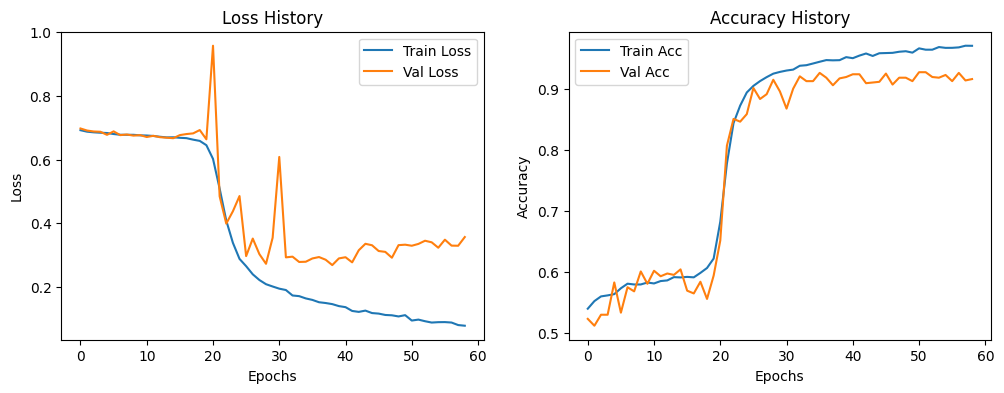

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, save_dir='checkpoints', early_stop_patience=20):
    best_acc = 0.0
    best_loss=10000
    best_model_wts = model.state_dict()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    no_improvement_epochs = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            data_loader = train_loader if phase == 'train' else val_loader
            total_samples = 0

            for inputs, labels in tqdm(data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                total_samples += labels.size(0)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    # Since UnetPlusPlus returns only one output, unpack only main_output
                    main_output = model(inputs)
                    _, preds = torch.max(main_output, 1)
                    loss = criterion(main_output, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # Check for improvement in validation accuracy
            # if phase == 'val' and epoch_acc > best_acc:
            if phase == 'val' and epoch_loss < best_loss:

                print(f"Validation loss improved from {best_loss:.4f} to {epoch_loss:.4f}, saving checkpoint...")
                # best_acc = epoch_acc
                best_loss = epoch_loss
                best_model_wts = model.state_dict()
                no_improvement_epochs = 0
                torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
            elif phase == 'val':
                no_improvement_epochs += 1

        # Early stopping
        if no_improvement_epochs >= early_stop_patience:
            print("Early stopping due to no improvement in validation accuracy.")
            break

    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history


def plot_history(history):
    epochs = len(history['train_loss'])
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.title('Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['train_acc'], label='Train Acc')
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.title('Accuracy History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import numpy as np
from torch.optim import AdamW  # Importing AdamW optimizer

class StructuredFlipAugmentation:
    def __init__(self, include_brightness_contrast=False, include_jitter=False):
        self.horizontal_flip = transforms.RandomHorizontalFlip(p=1.0)
        self.vertical_flip = transforms.RandomVerticalFlip(p=1.0)
        self.include_brightness_contrast = include_brightness_contrast
        self.include_jitter = include_jitter
        self.jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
        self.gaussian_noise = lambda img: img + torch.randn(img.size()) * 0.1  # Add Gaussian noise

        if include_brightness_contrast:
            self.brightness_contrast = transforms.ColorJitter(brightness=0.2, contrast=0.2)

    def apply_flips(self, img):
        augmented = [
            img,  # Original image
            self.vertical_flip(img),  # Vertically flipped
            self.horizontal_flip(img),  # Horizontally flipped
            self.vertical_flip(self.horizontal_flip(img))  # Both vertical and horizontal flipped
        ]
        return augmented

    def apply_brightness_contrast(self, augmented_images):
        return [self.brightness_contrast(img) for img in augmented_images]

    def apply_jitter(self, augmented_images):
        return [self.jitter(img) for img in augmented_images]

    def __call__(self, img, augmentation_type='flip'):
        augmented = self.apply_flips(img)

        if augmentation_type == 'fully' and self.include_brightness_contrast:
            brightness_contrast_augmented = self.apply_brightness_contrast(augmented)
            augmented.extend(brightness_contrast_augmented)

        if self.include_jitter:
            jitter_augmented = self.apply_jitter(augmented)
            augmented.extend(jitter_augmented)

        return augmented


class SolarCellDataset(Dataset):
    def __init__(self, dataframe, transform=None, augmentation='none'):
        self.dataframe = dataframe
        self.transform = transform
        self.augmentation = augmentation
        self.flip_aug = StructuredFlipAugmentation(include_brightness_contrast=(augmentation == 'fully'),
                                                   include_jitter=(augmentation == 'jitter'))

    def __len__(self):
        if self.augmentation == 'none':
            return len(self.dataframe)
        elif self.augmentation == 'flip':
            return len(self.dataframe) * 4  # Original + 3 flips
        elif self.augmentation == 'fully':
            return len(self.dataframe) * 8  # Flip (4x) + Brightness/Contrast (4x)
        elif self.augmentation == 'jitter':
            return len(self.dataframe) * 12  # Add jitter to fully augmented data

    def __getitem__(self, idx):
        # Find the index of the original image in the dataframe
        original_idx = idx % len(self.dataframe)  # Wrap idx around the length of original dataset
        img_path = self.dataframe.iloc[original_idx, 0]  # Assuming 'file_path' is the first column
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = self.dataframe.iloc[original_idx, 1]  # Assuming 'LABEL' is the second column

        if self.augmentation != 'none':
            # Apply structured flipping and (optionally) brightness/contrast augmentation
            augmented_images = self.flip_aug(image, augmentation_type=self.augmentation)
            image = augmented_images[idx % len(augmented_images)]

            # image = augmented_images[idx // len(self.dataframe)]  # Select the corresponding augmented image

        if self.transform:
            image = self.transform(image)

        return image, label


# Load and preprocess data
transformed_df = pd.read_csv('transformed_data.csv')



# Use undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(transformed_df[['file_path']], transformed_df['LABEL'])
balanced_df = pd.DataFrame({'file_path': X_resampled['file_path'], 'LABEL': y_resampled})
train_df, eval_df = train_test_split(balanced_df, test_size=0.15, random_state=42, stratify=balanced_df['LABEL'])
criterion = nn.CrossEntropyLoss()


transform = transforms.Compose([
    transforms.Resize((608, 128)),  # Adjust dimensions if necessary
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize the grayscale image
])



train_dataset = SolarCellDataset(dataframe=train_df, transform=transform, augmentation='jitter')
eval_dataset = SolarCellDataset(dataframe=eval_df, transform=transform, augmentation='flip')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

class SolarCellCrackDetector(nn.Module):
    def __init__(self, num_classes=2):
        super(SolarCellCrackDetector, self).__init__()
        self.model = CustomCNN(num_classes=num_classes)

    def forward(self, x):
        return self.model(x)


class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=3),  # First layer with kernel size 7
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=2),  # Second layer with kernel size 5
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # Third layer with kernel size 3
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        # Removed the fourth convolutional layer
        # The adaptive pooling is applied directly in the forward method after conv3

        self.fc = nn.Sequential(
            nn.Linear(128, num_classes),  # Adjusted input size for the first fully connected layer
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = nn.AdaptiveAvgPool2d((1, 1))(x)  # Adaptive pooling after the last conv layer
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)
        return x


# Instantiate the model
model = SolarCellCrackDetector(num_classes=2).to(device)
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# Create checkpoints directory if it doesn't exist
if not os.path.exists('checkpoints'):
    os.makedirs('checkpoints')

# Train the model
trained_model, history = train_model(model, train_loader, eval_loader, criterion, optimizer, num_epochs, device)

# Plot the training history
plot_history(history)

# Save the final model
torch.save(trained_model.state_dict(), 'solar_cell_crack_detector_final5.pth')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, save_dir='checkpoints', early_stop_patience=20):
    best_acc = 0.0
    best_loss=10000
    best_model_wts = model.state_dict()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    no_improvement_epochs = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            data_loader = train_loader if phase == 'train' else val_loader
            total_samples = 0

            for inputs, labels in tqdm(data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                total_samples += labels.size(0)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    # Since UnetPlusPlus returns only one output, unpack only main_output
                    main_output = model(inputs)
                    _, preds = torch.max(main_output, 1)
                    loss = criterion(main_output, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # Check for improvement in validation accuracy
            # if phase == 'val' and epoch_acc > best_acc:
            if phase == 'val' and epoch_loss < best_loss:

                print(f"Validation loss improved from {best_loss:.4f} to {epoch_loss:.4f}, saving checkpoint...")
                # best_acc = epoch_acc
                best_loss = epoch_loss
                best_model_wts = model.state_dict()
                no_improvement_epochs = 0
                torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
            elif phase == 'val':
                no_improvement_epochs += 1

        # Early stopping
        if no_improvement_epochs >= early_stop_patience:
            print("Early stopping due to no improvement in validation accuracy.")
            break

    print(f'Best val Acc: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history


def plot_history(history):
    epochs = len(history['train_loss'])
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.title('Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['train_acc'], label='Train Acc')
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.title('Accuracy History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import numpy as np
from torch.optim import AdamW  # Importing AdamW optimizer

class StructuredFlipAugmentation:
    def __init__(self, include_brightness_contrast=False, include_jitter=False):
        self.horizontal_flip = transforms.RandomHorizontalFlip(p=1.0)
        self.vertical_flip = transforms.RandomVerticalFlip(p=1.0)
        self.include_brightness_contrast = include_brightness_contrast
        self.include_jitter = include_jitter
        self.jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
        self.gaussian_noise = lambda img: img + torch.randn(img.size()) * 0.1  # Add Gaussian noise

        if include_brightness_contrast:
            self.brightness_contrast = transforms.ColorJitter(brightness=0.2, contrast=0.2)

    def apply_flips(self, img):
        augmented = [
            img,  # Original image
            self.vertical_flip(img),  # Vertically flipped
            self.horizontal_flip(img),  # Horizontally flipped
            self.vertical_flip(self.horizontal_flip(img))  # Both vertical and horizontal flipped
        ]
        return augmented

    def apply_brightness_contrast(self, augmented_images):
        return [self.brightness_contrast(img) for img in augmented_images]

    def apply_jitter(self, augmented_images):
        return [self.jitter(img) for img in augmented_images]

    def __call__(self, img, augmentation_type='flip'):
        augmented = self.apply_flips(img)

        if augmentation_type == 'fully' and self.include_brightness_contrast:
            brightness_contrast_augmented = self.apply_brightness_contrast(augmented)
            augmented.extend(brightness_contrast_augmented)

        if self.include_jitter:
            jitter_augmented = self.apply_jitter(augmented)
            augmented.extend(jitter_augmented)

        return augmented


class SolarCellDataset(Dataset):
    def __init__(self, dataframe, transform=None, augmentation='none'):
        self.dataframe = dataframe
        self.transform = transform
        self.augmentation = augmentation
        self.flip_aug = StructuredFlipAugmentation(include_brightness_contrast=(augmentation == 'fully'),
                                                   include_jitter=(augmentation == 'jitter'))

    def __len__(self):
        if self.augmentation == 'none':
            return len(self.dataframe)
        elif self.augmentation == 'flip':
            return len(self.dataframe) * 4  # Original + 3 flips
        elif self.augmentation == 'fully':
            return len(self.dataframe) * 8  # Flip (4x) + Brightness/Contrast (4x)
        elif self.augmentation == 'jitter':
            return len(self.dataframe) * 12  # Add jitter to fully augmented data

    def __getitem__(self, idx):
        # Find the index of the original image in the dataframe
        original_idx = idx % len(self.dataframe)  # Wrap idx around the length of original dataset
        img_path = self.dataframe.iloc[original_idx, 0]  # Assuming 'file_path' is the first column
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = self.dataframe.iloc[original_idx, 1]  # Assuming 'LABEL' is the second column

        if self.augmentation != 'none':
            # Apply structured flipping and (optionally) brightness/contrast augmentation
            augmented_images = self.flip_aug(image, augmentation_type=self.augmentation)
            image = augmented_images[idx % len(augmented_images)]

            # image = augmented_images[idx // len(self.dataframe)]  # Select the corresponding augmented image

        if self.transform:
            image = self.transform(image)

        return image, label


# Load and preprocess data
transformed_df = pd.read_csv('transformed_data.csv')



# Use undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(transformed_df[['file_path']], transformed_df['LABEL'])
balanced_df = pd.DataFrame({'file_path': X_resampled['file_path'], 'LABEL': y_resampled})
train_df, eval_df = train_test_split(balanced_df, test_size=0.15, random_state=42, stratify=balanced_df['LABEL'])
criterion = nn.CrossEntropyLoss()


transform = transforms.Compose([
    transforms.Resize((608, 128)),  # Adjust dimensions if necessary
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize the grayscale image
])



train_dataset = SolarCellDataset(dataframe=train_df, transform=transform, augmentation='jitter')
eval_dataset = SolarCellDataset(dataframe=eval_df, transform=transform, augmentation='flip')

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

class SolarCellCrackDetector(nn.Module):
    def __init__(self, num_classes=2):
        super(SolarCellCrackDetector, self).__init__()
        self.model = CustomCNN(num_classes=num_classes)

    def forward(self, x):
        return self.model(x)


class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=9, stride=1, padding=3),  # First layer with kernel size 7
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=7, stride=1, padding=2),  # Second layer with kernel size 5
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=1),  # Third layer with kernel size 3
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        # Removed the fourth convolutional layer
        # The adaptive pooling is applied directly in the forward method after conv3

        self.fc = nn.Sequential(
            # nn.Linear(64, 32),  # Adjusted input size for the first fully connected layer
            # nn.ReLU(),
            # nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = nn.AdaptiveAvgPool2d((1, 1))(x)  # Adaptive pooling after the last conv layer
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)
        return x


Epoch 1/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.82it/s]


train Loss: 0.6907 Acc: 0.5478


100%|██████████| 56/56 [00:01<00:00, 30.09it/s]


val Loss: 0.6914 Acc: 0.5541
Validation loss improved from 10000.0000 to 0.6914, saving checkpoint...
Epoch 2/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.76it/s]


train Loss: 0.6831 Acc: 0.5643


100%|██████████| 56/56 [00:01<00:00, 29.94it/s]


val Loss: 0.6895 Acc: 0.5372
Validation loss improved from 0.6914 to 0.6895, saving checkpoint...
Epoch 3/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.86it/s]


train Loss: 0.6810 Acc: 0.5747


100%|██████████| 56/56 [00:01<00:00, 29.48it/s]


val Loss: 0.6812 Acc: 0.5642
Validation loss improved from 0.6895 to 0.6812, saving checkpoint...
Epoch 4/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.80it/s]


train Loss: 0.6778 Acc: 0.5769


100%|██████████| 56/56 [00:01<00:00, 29.89it/s]


val Loss: 0.6901 Acc: 0.5146
Epoch 5/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.00it/s]


train Loss: 0.6775 Acc: 0.5787


100%|██████████| 56/56 [00:01<00:00, 29.48it/s]


val Loss: 0.6797 Acc: 0.5676
Validation loss improved from 0.6812 to 0.6797, saving checkpoint...
Epoch 6/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.75it/s]


train Loss: 0.6758 Acc: 0.5770


100%|██████████| 56/56 [00:01<00:00, 29.73it/s]


val Loss: 0.6734 Acc: 0.5653
Validation loss improved from 0.6797 to 0.6734, saving checkpoint...
Epoch 7/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.95it/s]


train Loss: 0.6762 Acc: 0.5770


100%|██████████| 56/56 [00:01<00:00, 29.56it/s]


val Loss: 0.6786 Acc: 0.5687
Epoch 8/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.72it/s]


train Loss: 0.6715 Acc: 0.5853


100%|██████████| 56/56 [00:01<00:00, 29.70it/s]


val Loss: 0.6841 Acc: 0.5236
Epoch 9/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.89it/s]


train Loss: 0.6727 Acc: 0.5797


100%|██████████| 56/56 [00:01<00:00, 30.30it/s]


val Loss: 0.6799 Acc: 0.5642
Epoch 10/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.67it/s]


train Loss: 0.6710 Acc: 0.5888


100%|██████████| 56/56 [00:01<00:00, 29.47it/s]


val Loss: 0.6791 Acc: 0.5653
Epoch 11/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.71it/s]


train Loss: 0.6705 Acc: 0.5826


100%|██████████| 56/56 [00:01<00:00, 29.61it/s]


val Loss: 0.6779 Acc: 0.5541
Epoch 12/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.70it/s]


train Loss: 0.6693 Acc: 0.5896


100%|██████████| 56/56 [00:01<00:00, 29.74it/s]


val Loss: 0.6790 Acc: 0.5529
Epoch 13/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.61it/s]


train Loss: 0.6690 Acc: 0.5876


100%|██████████| 56/56 [00:01<00:00, 29.83it/s]


val Loss: 0.6807 Acc: 0.5608
Epoch 14/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.80it/s]


train Loss: 0.6679 Acc: 0.5880


100%|██████████| 56/56 [00:01<00:00, 29.58it/s]


val Loss: 0.6788 Acc: 0.5541
Epoch 15/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.62it/s]


train Loss: 0.6684 Acc: 0.5890


100%|██████████| 56/56 [00:01<00:00, 29.25it/s]


val Loss: 0.6769 Acc: 0.5552
Epoch 16/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.63it/s]


train Loss: 0.6663 Acc: 0.5941


100%|██████████| 56/56 [00:01<00:00, 29.94it/s]


val Loss: 0.6712 Acc: 0.5732
Validation loss improved from 0.6734 to 0.6712, saving checkpoint...
Epoch 17/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.82it/s]


train Loss: 0.6632 Acc: 0.5946


100%|██████████| 56/56 [00:01<00:00, 29.33it/s]


val Loss: 0.6740 Acc: 0.5586
Epoch 18/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.57it/s]


train Loss: 0.6610 Acc: 0.6034


100%|██████████| 56/56 [00:01<00:00, 29.46it/s]


val Loss: 0.6753 Acc: 0.5586
Epoch 19/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.85it/s]


train Loss: 0.6610 Acc: 0.6026


100%|██████████| 56/56 [00:01<00:00, 29.69it/s]


val Loss: 0.6756 Acc: 0.5777
Epoch 20/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.73it/s]


train Loss: 0.6578 Acc: 0.6069


100%|██████████| 56/56 [00:01<00:00, 28.77it/s]


val Loss: 0.6719 Acc: 0.5991
Epoch 21/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.88it/s]


train Loss: 0.6516 Acc: 0.6150


100%|██████████| 56/56 [00:01<00:00, 29.62it/s]


val Loss: 0.6716 Acc: 0.5721
Epoch 22/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.44it/s]


train Loss: 0.6450 Acc: 0.6287


100%|██████████| 56/56 [00:01<00:00, 29.35it/s]


val Loss: 0.6658 Acc: 0.5800
Validation loss improved from 0.6712 to 0.6658, saving checkpoint...
Epoch 23/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.81it/s]


train Loss: 0.6208 Acc: 0.6639


100%|██████████| 56/56 [00:01<00:00, 30.32it/s]


val Loss: 0.6141 Acc: 0.6779
Validation loss improved from 0.6658 to 0.6141, saving checkpoint...
Epoch 24/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.80it/s]


train Loss: 0.5777 Acc: 0.7296


100%|██████████| 56/56 [00:01<00:00, 28.83it/s]


val Loss: 0.5465 Acc: 0.7804
Validation loss improved from 0.6141 to 0.5465, saving checkpoint...
Epoch 25/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.62it/s]


train Loss: 0.5065 Acc: 0.8118


100%|██████████| 56/56 [00:01<00:00, 29.81it/s]


val Loss: 0.6268 Acc: 0.7736
Epoch 26/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.80it/s]


train Loss: 0.4271 Acc: 0.8690


100%|██████████| 56/56 [00:01<00:00, 29.89it/s]


val Loss: 0.4000 Acc: 0.8705
Validation loss improved from 0.5465 to 0.4000, saving checkpoint...
Epoch 27/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.83it/s]


train Loss: 0.3581 Acc: 0.9002


100%|██████████| 56/56 [00:01<00:00, 28.90it/s]


val Loss: 0.3580 Acc: 0.8829
Validation loss improved from 0.4000 to 0.3580, saving checkpoint...
Epoch 28/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.44it/s]


train Loss: 0.2925 Acc: 0.9216


100%|██████████| 56/56 [00:01<00:00, 29.56it/s]


val Loss: 0.3069 Acc: 0.9099
Validation loss improved from 0.3580 to 0.3069, saving checkpoint...
Epoch 29/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.71it/s]


train Loss: 0.2559 Acc: 0.9275


100%|██████████| 56/56 [00:01<00:00, 28.69it/s]


val Loss: 0.2681 Acc: 0.9122
Validation loss improved from 0.3069 to 0.2681, saving checkpoint...
Epoch 30/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.81it/s]


train Loss: 0.2127 Acc: 0.9397


100%|██████████| 56/56 [00:01<00:00, 30.24it/s]


val Loss: 0.2744 Acc: 0.9167
Epoch 31/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.65it/s]


train Loss: 0.1848 Acc: 0.9471


100%|██████████| 56/56 [00:01<00:00, 28.98it/s]


val Loss: 0.2774 Acc: 0.9099
Epoch 32/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.67it/s]


train Loss: 0.1703 Acc: 0.9497


100%|██████████| 56/56 [00:01<00:00, 29.09it/s]


val Loss: 0.4406 Acc: 0.9167
Epoch 33/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.79it/s]


train Loss: 0.1494 Acc: 0.9553


100%|██████████| 56/56 [00:01<00:00, 30.53it/s]


val Loss: 1.7189 Acc: 0.8547
Epoch 34/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.84it/s]


train Loss: 0.1507 Acc: 0.9546


100%|██████████| 56/56 [00:01<00:00, 29.90it/s]


val Loss: 0.2236 Acc: 0.9313
Validation loss improved from 0.2681 to 0.2236, saving checkpoint...
Epoch 35/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.79it/s]


train Loss: 0.1266 Acc: 0.9617


100%|██████████| 56/56 [00:01<00:00, 29.53it/s]


val Loss: 0.2728 Acc: 0.9223
Epoch 36/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.68it/s]


train Loss: 0.1194 Acc: 0.9638


100%|██████████| 56/56 [00:01<00:00, 29.06it/s]


val Loss: 0.2199 Acc: 0.9302
Validation loss improved from 0.2236 to 0.2199, saving checkpoint...
Epoch 37/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.94it/s]


train Loss: 0.1236 Acc: 0.9610


100%|██████████| 56/56 [00:01<00:00, 30.54it/s]


val Loss: 0.2317 Acc: 0.9279
Epoch 38/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.71it/s]


train Loss: 0.1232 Acc: 0.9604


100%|██████████| 56/56 [00:01<00:00, 29.69it/s]


val Loss: 0.2071 Acc: 0.9358
Validation loss improved from 0.2199 to 0.2071, saving checkpoint...
Epoch 39/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.86it/s]


train Loss: 0.1012 Acc: 0.9680


100%|██████████| 56/56 [00:01<00:00, 29.72it/s]


val Loss: 0.2356 Acc: 0.9302
Epoch 40/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.87it/s]


train Loss: 0.0943 Acc: 0.9703


100%|██████████| 56/56 [00:01<00:00, 29.75it/s]


val Loss: 0.2809 Acc: 0.9268
Epoch 41/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.00it/s]


train Loss: 0.1126 Acc: 0.9640


100%|██████████| 56/56 [00:01<00:00, 30.34it/s]


val Loss: 0.2685 Acc: 0.9313
Epoch 42/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.75it/s]


train Loss: 0.0943 Acc: 0.9697


100%|██████████| 56/56 [00:01<00:00, 28.64it/s]


val Loss: 0.3219 Acc: 0.9257
Epoch 43/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.93it/s]


train Loss: 0.0866 Acc: 0.9737


100%|██████████| 56/56 [00:01<00:00, 30.25it/s]


val Loss: 0.3314 Acc: 0.9234
Epoch 44/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.83it/s]


train Loss: 0.0889 Acc: 0.9736


100%|██████████| 56/56 [00:01<00:00, 28.58it/s]


val Loss: 0.2734 Acc: 0.9122
Epoch 45/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.93it/s]


train Loss: 0.0804 Acc: 0.9747


100%|██████████| 56/56 [00:01<00:00, 29.79it/s]


val Loss: 0.2527 Acc: 0.9347
Epoch 46/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.84it/s]


train Loss: 0.0837 Acc: 0.9736


100%|██████████| 56/56 [00:01<00:00, 29.11it/s]


val Loss: 0.3192 Acc: 0.9279
Epoch 47/100
----------


100%|██████████| 942/942 [00:28<00:00, 33.03it/s]


train Loss: 0.0705 Acc: 0.9786


100%|██████████| 56/56 [00:01<00:00, 29.40it/s]


val Loss: 0.3179 Acc: 0.9291
Epoch 48/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.79it/s]


train Loss: 0.0840 Acc: 0.9718


100%|██████████| 56/56 [00:01<00:00, 29.06it/s]


val Loss: 0.2696 Acc: 0.9302
Epoch 49/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.94it/s]


train Loss: 0.1000 Acc: 0.9688


100%|██████████| 56/56 [00:01<00:00, 29.83it/s]


val Loss: 0.7464 Acc: 0.7770
Epoch 50/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.81it/s]


train Loss: 0.1031 Acc: 0.9645


100%|██████████| 56/56 [00:01<00:00, 29.00it/s]


val Loss: 0.2432 Acc: 0.9336
Epoch 51/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.91it/s]


train Loss: 0.0669 Acc: 0.9784


100%|██████████| 56/56 [00:01<00:00, 30.02it/s]


val Loss: 0.2482 Acc: 0.9336
Epoch 52/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.71it/s]


train Loss: 0.0636 Acc: 0.9792


100%|██████████| 56/56 [00:02<00:00, 27.86it/s]


val Loss: 0.2719 Acc: 0.9245
Epoch 53/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.84it/s]


train Loss: 0.0617 Acc: 0.9794


100%|██████████| 56/56 [00:01<00:00, 29.34it/s]


val Loss: 0.3262 Acc: 0.9257
Epoch 54/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.68it/s]


train Loss: 0.0646 Acc: 0.9782


100%|██████████| 56/56 [00:01<00:00, 28.71it/s]


val Loss: 0.2659 Acc: 0.9324
Epoch 55/100
----------


100%|██████████| 942/942 [00:29<00:00, 32.29it/s]


train Loss: 0.0607 Acc: 0.9796


100%|██████████| 56/56 [00:01<00:00, 29.54it/s]


val Loss: 0.2849 Acc: 0.9291
Epoch 56/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.87it/s]


train Loss: 0.0524 Acc: 0.9835


100%|██████████| 56/56 [00:01<00:00, 29.14it/s]


val Loss: 0.2919 Acc: 0.9257
Epoch 57/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.81it/s]


train Loss: 0.0546 Acc: 0.9815


100%|██████████| 56/56 [00:01<00:00, 29.02it/s]


val Loss: 0.3246 Acc: 0.9200
Epoch 58/100
----------


100%|██████████| 942/942 [00:28<00:00, 32.60it/s]


train Loss: 0.0544 Acc: 0.9813


100%|██████████| 56/56 [00:01<00:00, 28.50it/s]


val Loss: 0.3278 Acc: 0.9223
Early stopping due to no improvement in validation accuracy.
Best val Acc: 0.0000


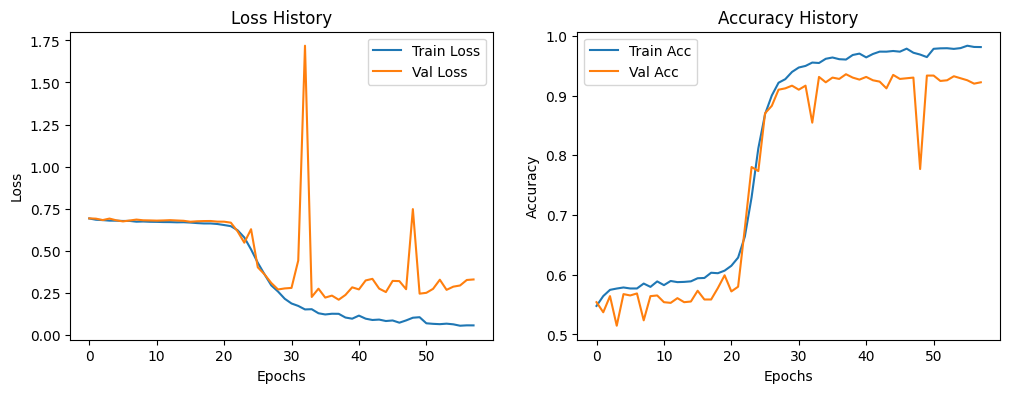

In [ ]:
# Instantiate the model
model = SolarCellCrackDetector(num_classes=2).to(device)
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# Create checkpoints directory if it doesn't exist
if not os.path.exists('checkpoints'):
    os.makedirs('checkpoints')

# Train the model
trained_model, history = train_model(model, train_loader, eval_loader, criterion, optimizer, num_epochs, device)

# Plot the training history
plot_history(history)

# Save the final model
torch.save(trained_model.state_dict(), 'solar_cell_crack_detector_final6.pth')

## last model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, device, save_dir='checkpoints', early_stop_patience=20):
    best_acc = 0.0
    best_loss=10000
    best_model_wts = model.state_dict()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    no_improvement_epochs = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            data_loader = train_loader if phase == 'train' else val_loader
            total_samples = 0

            for inputs, labels in tqdm(data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                total_samples += labels.size(0)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    # Since UnetPlusPlus returns only one output, unpack only main_output
                    main_output = model(inputs)
                    _, preds = torch.max(main_output, 1)
                    loss = criterion(main_output, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # Check for improvement in validation accuracy
            # if phase == 'val':
                # Update the scheduler
                # scheduler.step(epoch_loss)

            # if phase == 'val' and epoch_acc > best_acc:
            if phase == 'val' and epoch_loss < best_loss:

                print(f"Validation loss improved from {best_loss:.4f} to {epoch_loss:.4f}, saving checkpoint...")
                # best_acc = epoch_acc
                best_loss = epoch_loss
                best_model_wts = model.state_dict()
                no_improvement_epochs = 0
                torch.save(model.state_dict(), os.path.join(save_dir, 'best_model.pth'))
            elif phase == 'val':
                no_improvement_epochs += 1
            if phase == 'val' and epoch_acc > best_acc:

                print(f"Accuracy improved from {best_acc:.4f} to {epoch_acc:.4f}, saving checkpoint...")
                best_acc = epoch_acc

        # Early stopping
        if no_improvement_epochs >= early_stop_patience:
            print("Early stopping due to no improvement in validation loss.")
            break

    print(f'Best val loss: {best_loss:.4f}')
    print(f'Best val accuracy: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history


def plot_history(history):
    epochs = len(history['train_loss'])
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.plot(range(epochs), history['val_loss'], label='Val Loss')
    plt.title('Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history['train_acc'], label='Train Acc')
    plt.plot(range(epochs), history['val_acc'], label='Val Acc')
    plt.title('Accuracy History')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import numpy as np
from torch.optim import AdamW  # Importing AdamW optimizer

class StructuredFlipAugmentation:
    def __init__(self, include_brightness_contrast=False, include_jitter=False):
        self.horizontal_flip = transforms.RandomHorizontalFlip(p=1.0)
        self.vertical_flip = transforms.RandomVerticalFlip(p=1.0)
        self.include_brightness_contrast = include_brightness_contrast
        self.include_jitter = include_jitter
        self.jitter = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
        self.gaussian_noise = lambda img: img + torch.randn(img.size()) * 0.1  # Add Gaussian noise

        if include_brightness_contrast:
            self.brightness_contrast = transforms.ColorJitter(brightness=0.2, contrast=0.2)

    def apply_flips(self, img):
        augmented = [
            img,  # Original image
            self.vertical_flip(img),  # Vertically flipped
            self.horizontal_flip(img),  # Horizontally flipped
            self.vertical_flip(self.horizontal_flip(img))  # Both vertical and horizontal flipped
        ]
        return augmented

    def apply_brightness_contrast(self, augmented_images):
        return [self.brightness_contrast(img) for img in augmented_images]

    def apply_jitter(self, augmented_images):
        return [self.jitter(img) for img in augmented_images]

    def __call__(self, img, augmentation_type='flip'):
        augmented = self.apply_flips(img)

        if augmentation_type == 'fully' and self.include_brightness_contrast:
            brightness_contrast_augmented = self.apply_brightness_contrast(augmented)
            augmented.extend(brightness_contrast_augmented)

        if self.include_jitter:
            jitter_augmented = self.apply_jitter(augmented)
            augmented.extend(jitter_augmented)

        return augmented


class SolarCellDataset(Dataset):
    def __init__(self, dataframe, transform=None, augmentation='none'):
        self.dataframe = dataframe
        self.transform = transform
        self.augmentation = augmentation
        self.flip_aug = StructuredFlipAugmentation(include_brightness_contrast=(augmentation == 'fully'),
                                                   include_jitter=(augmentation == 'jitter'))

    def __len__(self):
        if self.augmentation == 'none':
            return len(self.dataframe)
        elif self.augmentation == 'flip':
            return len(self.dataframe) * 4  # Original + 3 flips
        elif self.augmentation == 'fully':
            return len(self.dataframe) * 8  # Flip (4x) + Brightness/Contrast (4x)
        elif self.augmentation == 'jitter':
            return len(self.dataframe) * 12  # Add jitter to fully augmented data

    def __getitem__(self, idx):
        # Find the index of the original image in the dataframe
        original_idx = idx % len(self.dataframe)  # Wrap idx around the length of original dataset
        img_path = self.dataframe.iloc[original_idx, 0]  # Assuming 'file_path' is the first column
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        label = self.dataframe.iloc[original_idx, 1]  # Assuming 'LABEL' is the second column

        if self.augmentation != 'none':
            # Apply structured flipping and (optionally) brightness/contrast augmentation
            augmented_images = self.flip_aug(image, augmentation_type=self.augmentation)
            image = augmented_images[idx % len(augmented_images)]

            # image = augmented_images[idx // len(self.dataframe)]  # Select the corresponding augmented image

        if self.transform:
            image = self.transform(image)

        return image, label


# Load and preprocess data
transformed_df = pd.read_csv('transformed_data.csv')  # Use all of this for training
new_labeled_df = pd.read_csv('new_labeled.csv')  # Use this for validation
unlabeled_df = pd.read_csv('unlabeled.csv')  # Use this for testing and labeling after training



# Use undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(transformed_df[['file_path']], transformed_df['LABEL'])
balanced_df = pd.DataFrame({'file_path': X_resampled['file_path'], 'LABEL': y_resampled})
criterion = nn.CrossEntropyLoss()
validation_df = pd.DataFrame({
    'file_path': new_labeled_df['file_path'],
    'LABEL': new_labeled_df['LABEL']
})

transform = transforms.Compose([
    transforms.Resize((608, 128)),  # Adjust dimensions if necessary
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize the grayscale image
])
Rus = RandomUnderSampler(random_state=42)
X_resampled_val, y_resampled_val = Rus.fit_resample(validation_df[['file_path']], validation_df['LABEL'])
balanced_val = pd.DataFrame({'file_path': X_resampled_val['file_path'], 'LABEL': y_resampled_val})

# Datasets
train_dataset = SolarCellDataset(dataframe=balanced_df, transform=transform, augmentation='jitter')
val_dataset = SolarCellDataset(dataframe=balanced_val, transform=transform, augmentation='none')
unlabeled_df = pd.read_csv('unlabeled.csv')  # Use this for testing and labeling after training

test_dataset = SolarCellDataset(dataframe=unlabeled_df, transform=transform, augmentation='none')  # Test set with no labels

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=num_workers, pin_memory=True)

class SolarCellCrackDetector(nn.Module):
    def __init__(self, num_classes=2):
        super(SolarCellCrackDetector, self).__init__()
        self.model = CustomCNN(num_classes=num_classes)

    def forward(self, x):
        return self.model(x)


class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=7, stride=1, padding=3),  # First layer with kernel size 7
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),  # Second layer with kernel size 5
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # Third layer with kernel size 3
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        # Removed the fourth convolutional layer
        # The adaptive pooling is applied directly in the forward method after conv3

        self.fc = nn.Sequential(
            nn.Linear(128, 64),  # Adjusted input size for the first fully connected layer
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = nn.AdaptiveAvgPool2d((1, 1))(x)  # Adaptive pooling after the last conv layer
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)
        return x

In [ ]:
def count_parameters(model):
    # Count total parameters
    total_params = sum(p.numel() for p in model.parameters())

    # Count trainable parameters
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    # Get parameter details for each layer
    print("Detailed parameter count by layer:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: {param.numel():,} parameters")

    print("\nSummary:")
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")

    return total_params, trainable_params

# Create and count parameters of your model
model = CustomCNN()
total, trainable = count_parameters(model)

Detailed parameter count by layer:
conv1.0.weight: 1,568 parameters
conv1.0.bias: 32 parameters
conv1.2.weight: 32 parameters
conv1.2.bias: 32 parameters
conv2.0.weight: 51,200 parameters
conv2.0.bias: 64 parameters
conv2.2.weight: 64 parameters
conv2.2.bias: 64 parameters
conv3.0.weight: 73,728 parameters
conv3.0.bias: 128 parameters
conv3.2.weight: 128 parameters
conv3.2.bias: 128 parameters
fc.0.weight: 8,192 parameters
fc.0.bias: 64 parameters
fc.3.weight: 128 parameters
fc.3.bias: 2 parameters

Summary:
Total parameters: 135,554
Trainable parameters: 135,554


Epoch 1/100
----------


100%|██████████| 555/555 [01:03<00:00,  8.80it/s]


train Loss: 0.6933 Acc: 0.5352


100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


val Loss: 0.7000 Acc: 0.4919
Validation loss improved from 10000.0000 to 0.7000, saving checkpoint...
Accuracy improved from 0.0000 to 0.4919, saving checkpoint...
Epoch 2/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.86it/s]


train Loss: 0.6875 Acc: 0.5478


100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


val Loss: 0.6940 Acc: 0.4899
Validation loss improved from 0.7000 to 0.6940, saving checkpoint...
Epoch 3/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6852 Acc: 0.5607


100%|██████████| 2/2 [00:02<00:00,  1.43s/it]


val Loss: 0.7013 Acc: 0.4899
Epoch 4/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.85it/s]


train Loss: 0.6810 Acc: 0.5740


100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


val Loss: 0.6996 Acc: 0.5142
Accuracy improved from 0.4919 to 0.5142, saving checkpoint...
Epoch 5/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.86it/s]


train Loss: 0.6800 Acc: 0.5753


100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


val Loss: 0.6946 Acc: 0.5202
Accuracy improved from 0.5142 to 0.5202, saving checkpoint...
Epoch 6/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.85it/s]


train Loss: 0.6786 Acc: 0.5747


100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


val Loss: 0.6974 Acc: 0.5081
Epoch 7/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.86it/s]


train Loss: 0.6760 Acc: 0.5824


100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


val Loss: 0.6919 Acc: 0.5061
Validation loss improved from 0.6940 to 0.6919, saving checkpoint...
Epoch 8/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6753 Acc: 0.5809


100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


val Loss: 0.7119 Acc: 0.4777
Epoch 9/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6738 Acc: 0.5863


100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


val Loss: 0.6929 Acc: 0.5466
Accuracy improved from 0.5202 to 0.5466, saving checkpoint...
Epoch 10/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6731 Acc: 0.5857


100%|██████████| 2/2 [00:02<00:00,  1.41s/it]


val Loss: 0.6931 Acc: 0.5243
Epoch 11/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.85it/s]


train Loss: 0.6721 Acc: 0.5863


100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


val Loss: 0.6947 Acc: 0.5182
Epoch 12/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.88it/s]


train Loss: 0.6720 Acc: 0.5863


100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


val Loss: 0.7020 Acc: 0.5040
Epoch 13/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6693 Acc: 0.5896


100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


val Loss: 0.7017 Acc: 0.5142
Epoch 14/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6684 Acc: 0.5934


100%|██████████| 2/2 [00:02<00:00,  1.30s/it]


val Loss: 0.7053 Acc: 0.5040
Epoch 15/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.88it/s]


train Loss: 0.6675 Acc: 0.5925


100%|██████████| 2/2 [00:02<00:00,  1.38s/it]


val Loss: 0.6947 Acc: 0.5405
Epoch 16/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.86it/s]


train Loss: 0.6667 Acc: 0.5944


100%|██████████| 2/2 [00:02<00:00,  1.36s/it]


val Loss: 0.7080 Acc: 0.5081
Epoch 17/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.88it/s]


train Loss: 0.6664 Acc: 0.5959


100%|██████████| 2/2 [00:02<00:00,  1.36s/it]


val Loss: 0.6908 Acc: 0.5445
Validation loss improved from 0.6919 to 0.6908, saving checkpoint...
Epoch 18/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6664 Acc: 0.5932


100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


val Loss: 0.6985 Acc: 0.5445
Epoch 19/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6648 Acc: 0.6004


100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


val Loss: 0.6928 Acc: 0.5162
Epoch 20/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6632 Acc: 0.6006


100%|██████████| 2/2 [00:02<00:00,  1.38s/it]


val Loss: 0.6944 Acc: 0.5223
Epoch 21/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.87it/s]


train Loss: 0.6597 Acc: 0.6077


100%|██████████| 2/2 [00:02<00:00,  1.37s/it]


val Loss: 0.7065 Acc: 0.5364
Epoch 22/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.89it/s]


train Loss: 0.6263 Acc: 0.6550


100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


val Loss: 0.6874 Acc: 0.5425
Validation loss improved from 0.6908 to 0.6874, saving checkpoint...
Epoch 23/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.88it/s]


train Loss: 0.5299 Acc: 0.7569


100%|██████████| 2/2 [00:02<00:00,  1.42s/it]


val Loss: 0.5312 Acc: 0.7591
Validation loss improved from 0.6874 to 0.5312, saving checkpoint...
Accuracy improved from 0.5466 to 0.7591, saving checkpoint...
Epoch 24/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.88it/s]


train Loss: 0.3832 Acc: 0.8577


100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


val Loss: 0.3784 Acc: 0.8603
Validation loss improved from 0.5312 to 0.3784, saving checkpoint...
Accuracy improved from 0.7591 to 0.8603, saving checkpoint...
Epoch 25/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.2864 Acc: 0.9004


100%|██████████| 2/2 [00:02<00:00,  1.37s/it]


val Loss: 0.2768 Acc: 0.9028
Validation loss improved from 0.3784 to 0.2768, saving checkpoint...
Accuracy improved from 0.8603 to 0.9028, saving checkpoint...
Epoch 26/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.88it/s]


train Loss: 0.2411 Acc: 0.9193


100%|██████████| 2/2 [00:02<00:00,  1.40s/it]


val Loss: 0.2954 Acc: 0.8947
Epoch 27/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.89it/s]


train Loss: 0.2218 Acc: 0.9242


100%|██████████| 2/2 [00:02<00:00,  1.28s/it]


val Loss: 0.2279 Acc: 0.9251
Validation loss improved from 0.2768 to 0.2279, saving checkpoint...
Accuracy improved from 0.9028 to 0.9251, saving checkpoint...
Epoch 28/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.88it/s]


train Loss: 0.1966 Acc: 0.9370


100%|██████████| 2/2 [00:02<00:00,  1.42s/it]


val Loss: 0.2285 Acc: 0.9332
Accuracy improved from 0.9251 to 0.9332, saving checkpoint...
Epoch 29/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.88it/s]


train Loss: 0.1880 Acc: 0.9393


100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


val Loss: 0.2258 Acc: 0.9312
Validation loss improved from 0.2279 to 0.2258, saving checkpoint...
Epoch 30/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1760 Acc: 0.9429


100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


val Loss: 0.2334 Acc: 0.9372
Accuracy improved from 0.9332 to 0.9372, saving checkpoint...
Epoch 31/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.88it/s]


train Loss: 0.1702 Acc: 0.9464


100%|██████████| 2/2 [00:02<00:00,  1.36s/it]


val Loss: 0.2173 Acc: 0.9393
Validation loss improved from 0.2258 to 0.2173, saving checkpoint...
Accuracy improved from 0.9372 to 0.9393, saving checkpoint...
Epoch 32/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1637 Acc: 0.9472


100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


val Loss: 0.2358 Acc: 0.9352
Epoch 33/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.89it/s]


train Loss: 0.1561 Acc: 0.9517


100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


val Loss: 0.2372 Acc: 0.9332
Epoch 34/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.89it/s]


train Loss: 0.1526 Acc: 0.9542


100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


val Loss: 0.2471 Acc: 0.9251
Epoch 35/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1516 Acc: 0.9535


100%|██████████| 2/2 [00:02<00:00,  1.40s/it]


val Loss: 0.2332 Acc: 0.9352
Epoch 36/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.89it/s]


train Loss: 0.1425 Acc: 0.9561


100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


val Loss: 0.2328 Acc: 0.9433
Accuracy improved from 0.9393 to 0.9433, saving checkpoint...
Epoch 37/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.89it/s]


train Loss: 0.1395 Acc: 0.9565


100%|██████████| 2/2 [00:02<00:00,  1.37s/it]


val Loss: 0.2378 Acc: 0.9413
Epoch 38/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.89it/s]


train Loss: 0.2004 Acc: 0.9344


100%|██████████| 2/2 [00:02<00:00,  1.36s/it]


val Loss: 0.2473 Acc: 0.9312
Epoch 39/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.91it/s]


train Loss: 0.1486 Acc: 0.9535


100%|██████████| 2/2 [00:02<00:00,  1.30s/it]


val Loss: 0.2345 Acc: 0.9433
Epoch 40/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1329 Acc: 0.9589


100%|██████████| 2/2 [00:02<00:00,  1.43s/it]


val Loss: 0.2281 Acc: 0.9413
Epoch 41/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1259 Acc: 0.9610


100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


val Loss: 0.2578 Acc: 0.9372
Epoch 42/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1226 Acc: 0.9624


100%|██████████| 2/2 [00:02<00:00,  1.36s/it]


val Loss: 0.2510 Acc: 0.9413
Epoch 43/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1188 Acc: 0.9626


100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


val Loss: 0.2739 Acc: 0.9312
Epoch 44/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1163 Acc: 0.9633


100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


val Loss: 0.2732 Acc: 0.9413
Epoch 45/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.89it/s]


train Loss: 0.1211 Acc: 0.9612


100%|██████████| 2/2 [00:02<00:00,  1.30s/it]


val Loss: 0.2679 Acc: 0.9393
Epoch 46/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1151 Acc: 0.9647


100%|██████████| 2/2 [00:02<00:00,  1.29s/it]


val Loss: 0.2509 Acc: 0.9393
Epoch 47/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1087 Acc: 0.9663


100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


val Loss: 0.2704 Acc: 0.9372
Epoch 48/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.89it/s]


train Loss: 0.1065 Acc: 0.9676


100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


val Loss: 0.2748 Acc: 0.9413
Epoch 49/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.91it/s]


train Loss: 0.1067 Acc: 0.9662


100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


val Loss: 0.2588 Acc: 0.9332
Epoch 50/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.91it/s]


train Loss: 0.1025 Acc: 0.9679


100%|██████████| 2/2 [00:02<00:00,  1.29s/it]


val Loss: 0.2690 Acc: 0.9332
Epoch 51/100
----------


100%|██████████| 555/555 [01:02<00:00,  8.90it/s]


train Loss: 0.1077 Acc: 0.9652


100%|██████████| 2/2 [00:02<00:00,  1.38s/it]


val Loss: 0.2804 Acc: 0.9332
Early stopping due to no improvement in validation loss.
Best val loss: 0.2173
Best val accuracy: 0.9433


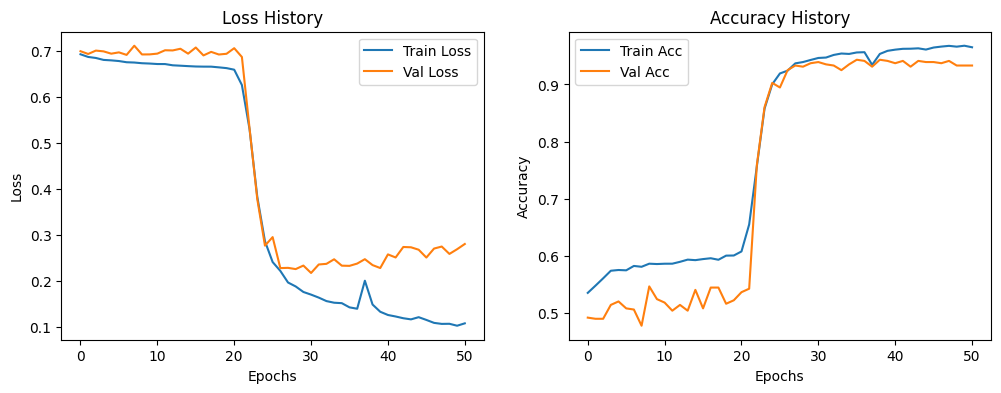

In [ ]:
#  Instantiate the model
model = SolarCellCrackDetector(num_classes=2).to(device)
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# Create checkpoints directory if it doesn't exist
if not os.path.exists('checkpoints'):
    os.makedirs('checkpoints')

# Scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=25)

# Train the model
trained_model, history = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, device)

# Plot the training history
plot_history(history)

# Save the final model
torch.save(trained_model.state_dict(), 'solar_cell_crack_detector_final.pth')


In [ ]:
# Instantiate the model
model = SolarCellCrackDetector(num_classes=2).to(device)

# Load the trained weights
model.load_state_dict(torch.load('solar_cell_crack_detector_final.pth'))

# Set the model to evaluation mode
model.eval()


<ipython-input-40-d29ebdbf9495>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('solar_cell_crack_detector_final.pth'))


SolarCellCrackDetector(
  (model): CustomCNN(
    (conv1): Sequential(
      (0): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
      (1): ReLU()
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Dropout(p=0.3, inplace=False)
    )
    (conv2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): ReLU()
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Dropout(p=0.2, inplace=False)
    )
    (conv3): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=

<ipython-input-203-0009733e627d>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('checkpoints/best_model.pth'))
Evaluating: 100%|████

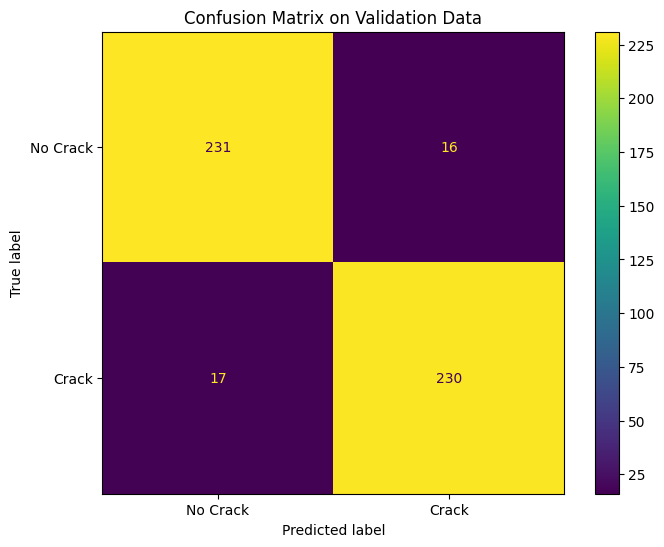

Accuracy: 0.9332


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from tqdm import tqdm

def generate_confusion_matrix(model, data_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Crack', 'Crack'])
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax)
    plt.title('Confusion Matrix on Validation Data')
    plt.show()

    # Calculate and print accuracy
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    print(f"Accuracy: {accuracy:.4f}")

    return cm, accuracy

# Load the best model
best_model = SolarCellCrackDetector(num_classes=2).to(device)
best_model.load_state_dict(torch.load('checkpoints/best_model.pth'))

# Generate confusion matrix
cm, accuracy = generate_confusion_matrix(best_model, val_loader, device)

<ipython-input-204-990d351faa99>:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('checkpoints/best_model.pth'))



Evaluating with threshold 0.3


Evaluating: 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


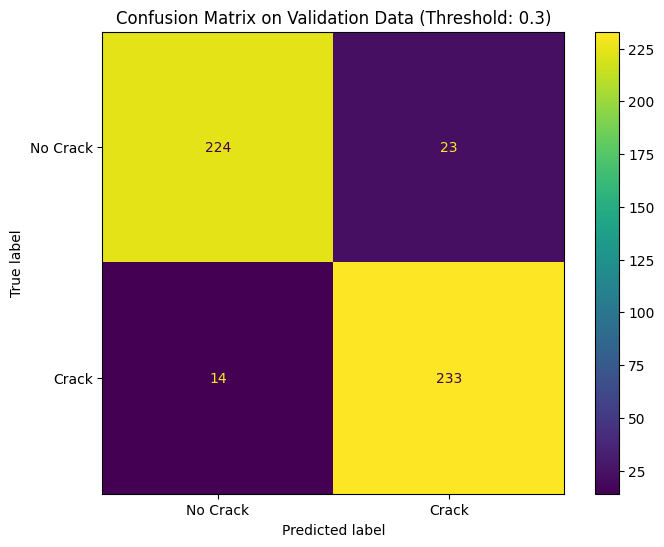

Threshold: 0.3
Accuracy: 0.9251
Precision: 0.9102
Recall: 0.9433
F1-score: 0.9264

Evaluating with threshold 0.4


Evaluating: 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


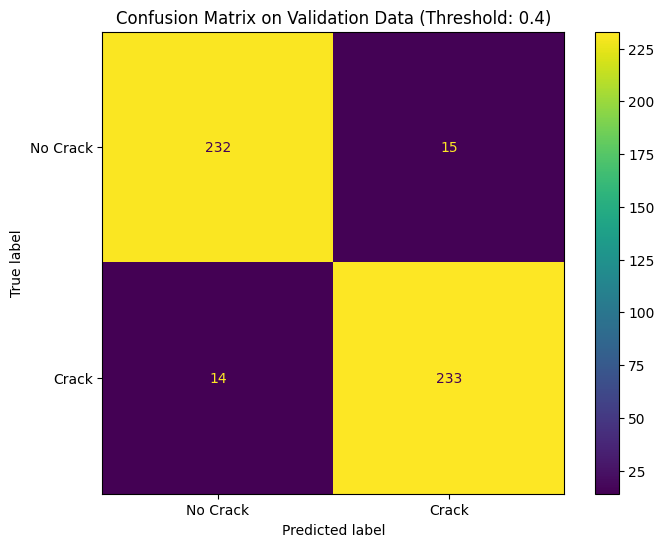

Threshold: 0.4
Accuracy: 0.9413
Precision: 0.9395
Recall: 0.9433
F1-score: 0.9414

Evaluating with threshold 0.5


Evaluating: 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]


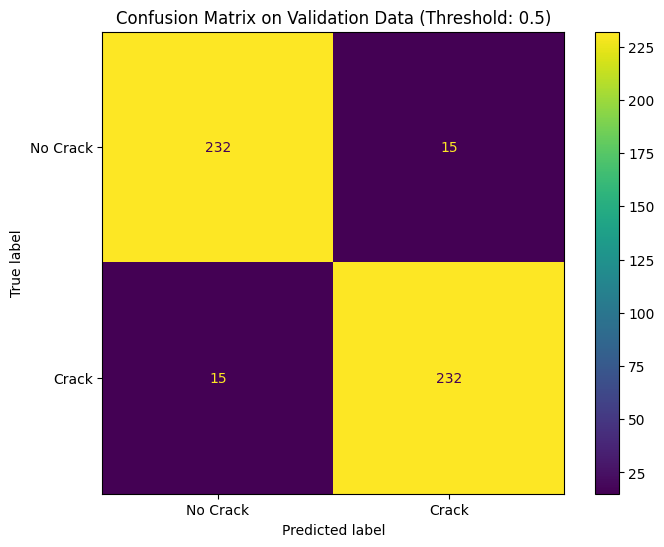

Threshold: 0.5
Accuracy: 0.9393
Precision: 0.9393
Recall: 0.9393
F1-score: 0.9393

Evaluating with threshold 0.6


Evaluating: 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]


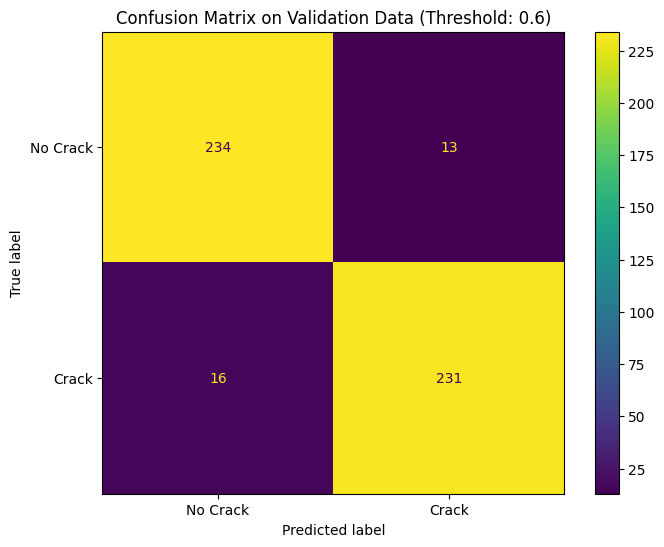

Threshold: 0.6
Accuracy: 0.9413
Precision: 0.9467
Recall: 0.9352
F1-score: 0.9409

Evaluating with threshold 0.7


Evaluating: 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]


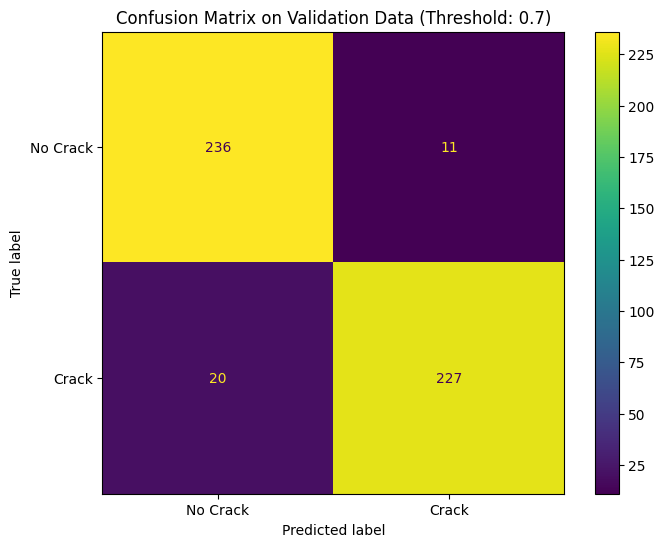

Threshold: 0.7
Accuracy: 0.9372
Precision: 0.9538
Recall: 0.9190
F1-score: 0.9361


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from tqdm import tqdm

def evaluate_with_custom_threshold(model, data_loader, device, threshold=0.5):
    model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability of crack

            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    # Apply custom threshold
    predictions = (all_probs >= threshold).astype(int)

    cm = confusion_matrix(all_labels, predictions)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Crack', 'Crack'])
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax)
    plt.title(f'Confusion Matrix on Validation Data (Threshold: {threshold})')
    plt.show()

    # Calculate and print metrics
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")

    return cm, accuracy, precision, recall, f1_score

# Load the best model
best_model = SolarCellCrackDetector(num_classes=2).to(device)
best_model.load_state_dict(torch.load('checkpoints/best_model.pth'))

# Evaluate with different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    print(f"\nEvaluating with threshold {threshold}")
    cm, accuracy, precision, recall, f1_score = evaluate_with_custom_threshold(best_model, val_loader, device, threshold)

In [ ]:
# Step to label the test (unlabeled) data after training
unlabeled_df = pd.read_csv('unlabeled.csv')  # Use this for testing and labeling after training

test_df = pd.DataFrame({
    'file_path': unlabeled_df['file_path'],
    'LABEL': np.nan  # Initialize with NaN for labels
})
test_dataset = SolarCellDataset(dataframe=test_df, transform=transform, augmentation='none')  # Test set with no labels
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=num_workers, pin_memory=True)

def label_test_data(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    predictions = []

    with torch.no_grad():
        for inputs, _ in tqdm(test_loader):
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds.cpu().numpy())

    return predictions
validation_df = pd.DataFrame({
    'file_path': new_labeled_df['file_path'],
    'LABEL': new_labeled_df['LABEL']
})
# Label the test data
test_predictions = label_test_data(model, test_loader, device)

# Save the test predictions to a CSV file
unlabeled_df['LABEL'] = test_predictions
unlabeled_df.to_csv('labeled_unlabeled.csv', index=False)

 49%|████▉     | 249/507 [07:02<07:18,  1.70s/it]  


KeyboardInterrupt: 

In [ ]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and prepare the data
unlabeled_df = pd.read_csv('unlabeled.csv')
test_df = pd.DataFrame({
    'file_path': unlabeled_df['file_path'],
    'LABEL': np.nan
})

# Create dataset and dataloader
test_dataset = SolarCellDataset(dataframe=test_df, transform=transform, augmentation='none')
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False, num_workers=num_cpus, pin_memory=True)

@torch.no_grad()
def label_test_data(model, test_loader, device):
    model.eval()
    all_preds = []

    for inputs, _ in tqdm(test_loader):
        inputs = inputs.to(device, non_blocking=True)
        outputs = model(inputs)
        preds = outputs.argmax(dim=1)
        all_preds.append(preds.cpu())

    return torch.cat(all_preds).numpy()


# Label the test data
test_predictions = label_test_data(model, test_loader, device)

# Save the test predictions
unlabeled_df['LABEL'] = test_predictions
unlabeled_df.to_csv('labeled_unlabeled.csv', index=False)

100%|██████████| 254/254 [1:11:41<00:00, 16.94s/it]


<ipython-input-43-604e946ed740>:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('checkpoints/best_model.pth'))
Evaluating: 100%|█████

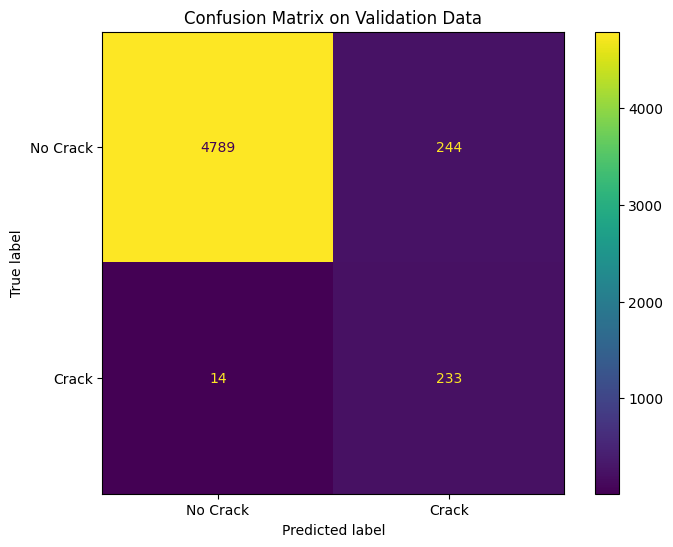

Accuracy: 0.9511


In [ ]:
validation_df = pd.DataFrame({
    'file_path': new_labeled_df['file_path'],
    'LABEL': new_labeled_df['LABEL']
})
val_dataset1 = SolarCellDataset(dataframe=validation_df, transform=transform, augmentation='none')
val_loader1 = DataLoader(val_dataset1, batch_size=256, shuffle=False, num_workers=num_workers, pin_memory=True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from tqdm import tqdm

def generate_confusion_matrix(model, data_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Crack', 'Crack'])
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax)
    plt.title('Confusion Matrix on Validation Data')
    plt.show()

    # Calculate and print accuracy
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    print(f"Accuracy: {accuracy:.4f}")

    return cm, accuracy

# Load the best model
best_model = SolarCellCrackDetector(num_classes=2).to(device)
best_model.load_state_dict(torch.load('checkpoints/best_model.pth'))

# Generate confusion matrix
cm, accuracy = generate_confusion_matrix(best_model, val_loader1, device)


Evaluating with threshold 0.9


Evaluating: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]


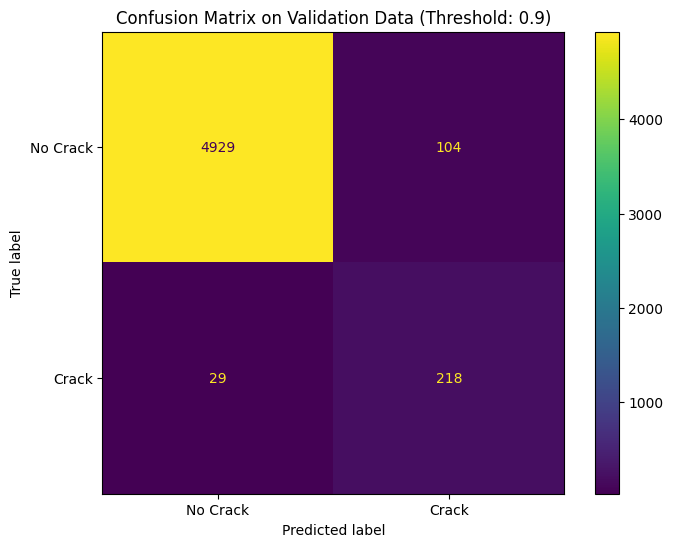

Threshold: 0.9
Accuracy: 0.9748
Precision: 0.6770
Recall: 0.8826
F1-score: 0.7663

Evaluating with threshold 0.925


Evaluating: 100%|██████████| 21/21 [00:13<00:00,  1.55it/s]


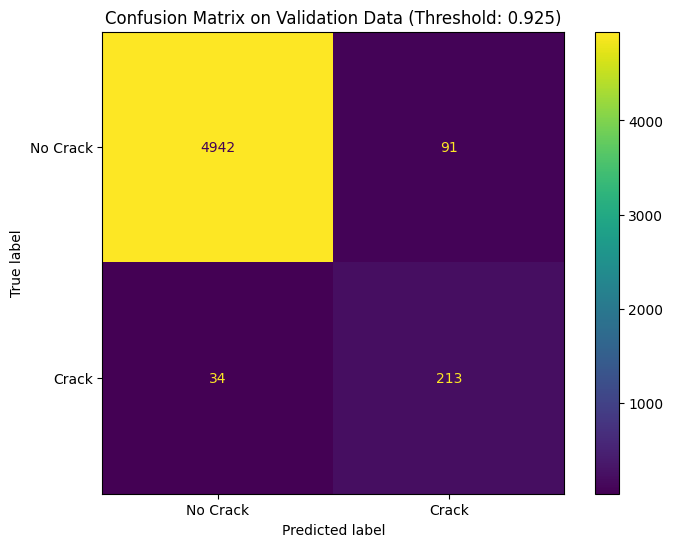

Threshold: 0.925
Accuracy: 0.9763
Precision: 0.7007
Recall: 0.8623
F1-score: 0.7731

Evaluating with threshold 0.95


Evaluating: 100%|██████████| 21/21 [00:12<00:00,  1.63it/s]


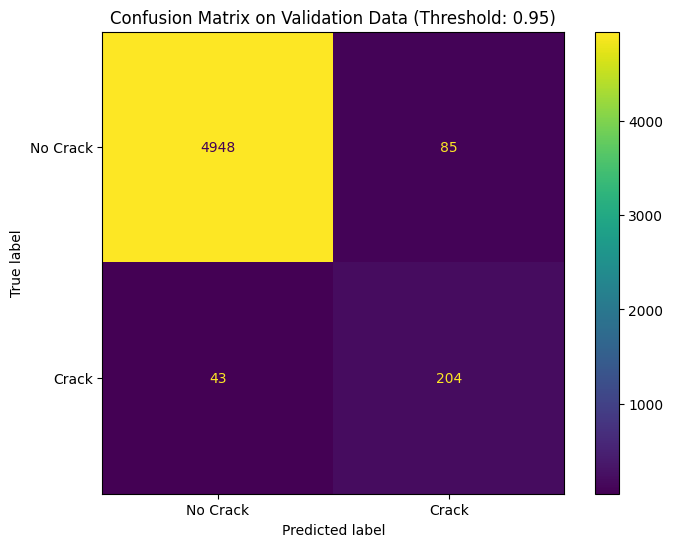

Threshold: 0.95
Accuracy: 0.9758
Precision: 0.7059
Recall: 0.8259
F1-score: 0.7612

Evaluating with threshold 0.975


Evaluating: 100%|██████████| 21/21 [00:12<00:00,  1.62it/s]


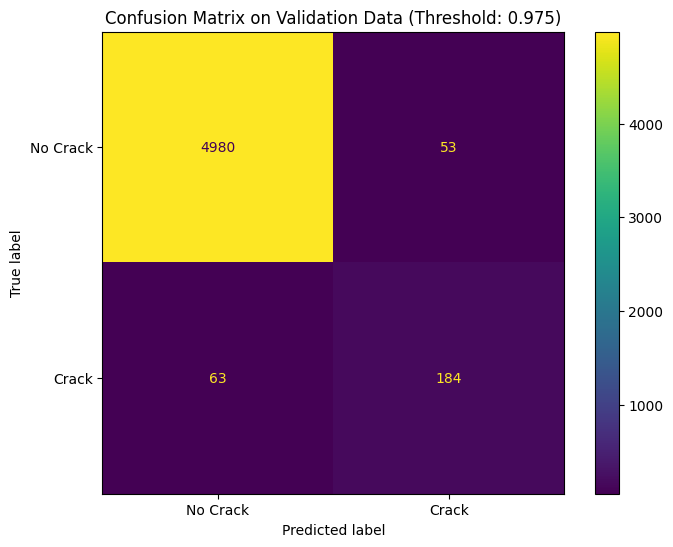

Threshold: 0.975
Accuracy: 0.9780
Precision: 0.7764
Recall: 0.7449
F1-score: 0.7603


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from tqdm import tqdm

def evaluate_with_custom_threshold(model, data_loader, device, threshold=0.5):
    model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability of crack

            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    # Apply custom threshold
    predictions = (all_probs >= threshold).astype(int)

    cm = confusion_matrix(all_labels, predictions)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Crack', 'Crack'])
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax)
    plt.title(f'Confusion Matrix on Validation Data (Threshold: {threshold})')
    plt.show()

    # Calculate and print metrics
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")

    return cm, accuracy, precision, recall, f1_score

# Load the best model
# best_model = SolarCellCrackDetector(num_classes=2).to(device)
# best_model.load_state_dict(torch.load('checkpoints/best_model.pth'))

# Evaluate with different thresholds
# thresholds = [.1,.2,0.3,.35,0.4,0.45, 0.5, 0.6, 0.7,0.8,.9]
thresholds = [.9,.925,.95,.975]
for threshold in thresholds:
    print(f"\nEvaluating with threshold {threshold}")
    cm, accuracy, precision, recall, f1_score = evaluate_with_custom_threshold(best_model, val_loader1, device, threshold)

In [ ]:
import torch
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Load and prepare the data
# unlabeled_df = pd.read_csv('unlabeled.csv')
# test_df = pd.DataFrame({
#     'file_path': unlabeled_df['file_path'],
#     'LABEL': np.nan
# })

# # Create dataset and dataloader
# test_dataset = SolarCellDataset(dataframe=test_df, transform=transform, augmentation='none')
# test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False, num_workers=num_cpus, pin_memory=True)

@torch.no_grad()
def label_test_data(model, test_loader, device, threshold=0.9):
    model.eval()
    all_preds = []

    for inputs, _ in tqdm(test_loader):
        inputs = inputs.to(device, non_blocking=True)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability of crack
        preds = (probs >= threshold).int()
        all_preds.append(preds.cpu())

    return torch.cat(all_preds).numpy()

# Label the test data
test_predictions = label_test_data(model, test_loader, device, threshold=0.9)

# Save the test predictions
unlabeled_df['LABEL'] = test_predictions
unlabeled_df.to_csv('labeled_unlabeled_90.csv', index=False)

100%|██████████| 254/254 [04:36<00:00,  1.09s/it]


In [ ]:
# prompt: only keep records of labeled_unlabeled_90.csv when column LABEL is 1

import pandas as pd

# Load the CSV file
df = pd.read_csv('labeled_unlabeled_90.csv')

# Filter the DataFrame to keep only rows where LABEL is 1
df_filtered = df[df['LABEL'] == 1]

# Save the filtered DataFrame to a new CSV file (optional)
df_filtered.to_csv('labeled_unlabeled_90_filtered.csv', index=False)
df_filtered

,Unnamed: 0,image_name,subfolder_name,cell_number,file_path,LABEL
3,11619,H06240200849972_240209010245.jpg,H06240209000316A012987C19F1,a4,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,1
63,11679,H06240200849972_240209010245.jpg,H06240209000316A012987C19F1,c20,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,1
69,11685,H06240200849972_240209010245.jpg,H06240209000316A012987C19F1,d4,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,1
102,11718,H06240200849972_240209010245.jpg,H06240209000316A012987C19F1,e15,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,1
143,11759,H06240200850083_240209012310.jpg,H06240209000316A012987C19F1,a12,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,1
...,...,...,...,...,...,...
129554,142094,H06240200816607_2_240211065303.jpg,H06240211001976A012987C19F1,c19,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,1
129578,142118,H06240200816607_2_240211065303.jpg,H06240211001976A012987C19F1,d21,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,1
129618,142158,H06240200816607_2_240211065303.jpg,H06240211001976A012987C19F1,f17,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,1
129644,142184,H06240200816650_240211071520.jpg,H06240211001976A012987C19F1,a21,/content/drive/MyDrive/new_nokhbegan_zip/H0624...,1


In [ ]:
# prompt: first reset index of df_filtered then using df_filtered column file_path, for each record of df_filtered copy image from file_path to target pat. target path is same as file_path but instead if starting with /content/drive/MyDrive/new_nokhbegan_zip starts with /content/drive/MyDrive/new_labeled so for target path you need to replace the /content/drive/MyDrive/new_nokhbegan_zip from begining

import shutil
import os

# Reset index of df_filtered
df_filtered = df_filtered.reset_index(drop=True)

# Iterate through each row of df_filtered
for index, row in df_filtered.iterrows():
  source_path = row['file_path']
  target_path = row['file_path'].replace('/content/drive/MyDrive/new_nokhbegan_zip', '/content/new_labeled')

  # Create the directory if it doesn't exist
  target_dir = os.path.dirname(target_path)
  if not os.path.exists(target_dir):
      os.makedirs(target_dir)

  # Copy the image
  shutil.copy(source_path, target_path)


In [ ]:
df_filtered.to_csv('labeled_unlabeled_90_filtered1.csv', index=False)


In [ ]:
# prompt: zip /content/new_labeled

!zip -r /content/new_labeled.zip /content/new_labeled


Streaming output truncated to the last 5000 lines.
  adding: content/new_labeled/H06240210002216A012987C19F1/H06240200850858_240209013108/sub_image_f8.png (deflated 0%)
  adding: content/new_labeled/H06240210002216A012987C19F1/H06240200850567_240209032111/ (stored 0%)
  adding: content/new_labeled/H06240210002216A012987C19F1/H06240200850567_240209032111/sub_image_e12.png (deflated 1%)
  adding: content/new_labeled/H06240210002216A012987C19F1/H06240200850567_240209032111/sub_image_b7.png (deflated 1%)
  adding: content/new_labeled/H06240210002216A012987C19F1/H06240200850567_240209032111/sub_image_e13.png (deflated 2%)
  adding: content/new_labeled/H06240210002216A012987C19F1/H06240200850567_240209032111/sub_image_c11.png (deflated 2%)
  adding: content/new_labeled/H06240210002216A012987C19F1/H06240200850567_240209032111/sub_image_c19.png (deflated 2%)
  adding: content/new_labeled/H06240210002216A012987C19F1/H06240200850567_240209032111/sub_image_c10.png (deflated 2%)
  adding: content/